In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import norm,geom,binom,poisson,expon,boxcox
import os

In [2]:
os.getcwd()
os.chdir('/content/sample_data')

In [3]:
df1=pd.read_csv('walmart_data.csv')
df1.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


# Exploratory Data Analysis

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [5]:
df1.isnull().sum()

,0
User_ID,0
Product_ID,0
Gender,0
Age,0
Occupation,0
City_Category,0
Stay_In_Current_City_Years,0
Marital_Status,0
Product_Category,0
Purchase,0


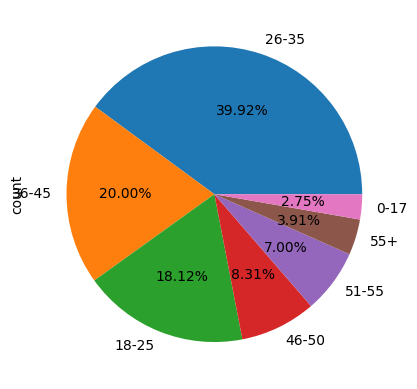

In [6]:
df1['Age'].value_counts().plot.pie(autopct='%.2f%%')
plt.show()

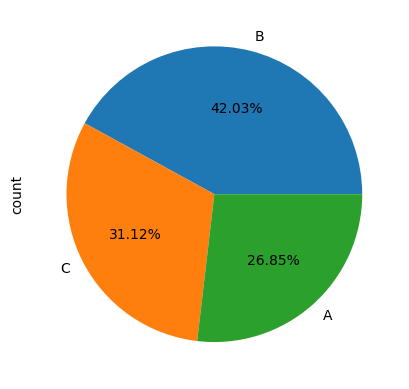

In [7]:
df1['City_Category'].value_counts().plot.pie(autopct='%.2f%%')
plt.show()

In [8]:
print(np.sort(df1['Occupation'].unique()))
df1['Occupation'].value_counts()

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


,count
Occupation,
4,72308
0,69638
7,59133
1,47426
17,40043
20,33562
12,31179
14,27309
2,26588


In [9]:
df1['Stay_In_Current_City_Years'].value_counts()

,count
Stay_In_Current_City_Years,
1,193821
2,101838
3,95285
4+,84726
0,74398


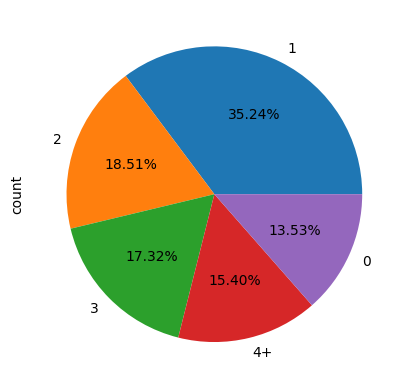

In [10]:
df1['Stay_In_Current_City_Years'].value_counts().plot.pie(autopct='%.2f%%')
plt.show()

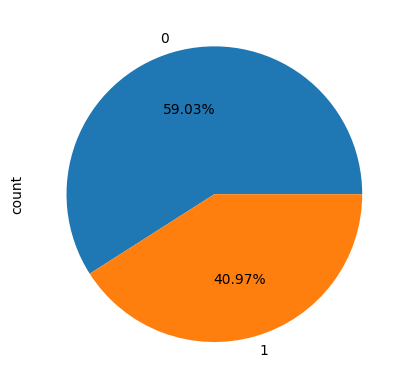

In [11]:
df1['Marital_Status'].value_counts().plot.pie(autopct='%.2f%%')
plt.show()

In [12]:
print(np.sort(df1['Product_Category'].unique()))
df1['Product_Category'].value_counts()

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


,count
Product_Category,
5,150933
1,140378
8,113925
11,24287
2,23864
6,20466
3,20213
4,11753
16,9828


In [13]:
df1.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


In [14]:
np.median(df1.select_dtypes(include=['int','float']),axis=0)

array([1.003077e+06, 7.000000e+00, 0.000000e+00, 5.000000e+00,
       8.047000e+03])

#### Observation:

1.   For the analysis  we will change the stay in current city in years to int replacing the '+' also outlier
2.   Basically male customer show up 3 times more than the female customer.
3.  So the total number  of male customer are 4225 and female are 1666.

## 1.User_ID column

In [15]:
df1['User_ID'].value_counts()

,count
User_ID,
1001680,1026
1004277,979
1001941,898
1001181,862
1000889,823
...,...
1004991,7
1005391,7
1000094,7


Value wise Gender :	 Gender
M    414259
F    135809
Name: count, dtype: int64


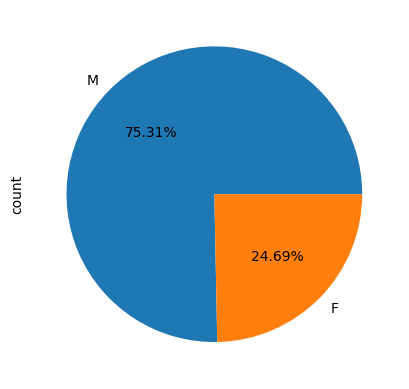

In [16]:
print("Value wise Gender :\t",df1['Gender'].value_counts())
df1['Gender'].value_counts().plot.pie(autopct='%.2f%%')
plt.show()

In [17]:
print("Shape or Total number of Transaction:\t",df1.shape)
print("No of unique user ",df1['User_ID'].nunique())

Shape or Total number of Transaction:	 (550068, 10)
No of unique user  5891


### a. User vs Gender

In [18]:
df1_male=df1[df1['Gender']=='M']
df1_female=df1[df1['Gender']=='F']
print("Total number of cutomers that are male:\t", df1_male['User_ID'].nunique())
print("Total number of cutomers that are female:\t", df1_female['User_ID'].nunique())
print("Total number of unique cutomers :\t", (df1_male['User_ID'].nunique()+df1_female['User_ID'].nunique()))

Total number of cutomers that are male:	 4225
Total number of cutomers that are female:	 1666
Total number of unique cutomers :	 5891


#### Observation:

1.   So the total number of male customer show up is 75% and 24% time female
2. Basically male customer show up 3 times more than the female customer.
3. Shape or Total number of Transaction:	 (550068, 10)
4. No of unique user  5891
5.  So the total number  of male customer are 4225 and female are 1666.



In [19]:
print(np.median(df1['Purchase']))
df1['Purchase'].describe()

8047.0


,Purchase
count,550068.000000
mean,9263.968713
std,5023.065394
min,12.000000
25%,5823.000000
50%,8047.000000
75%,12054.000000
max,23961.000000


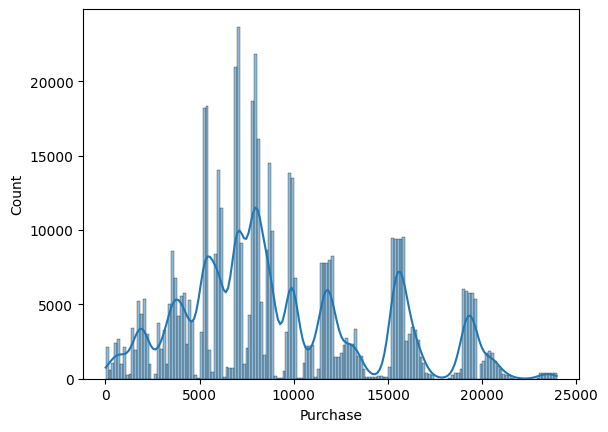

In [20]:
sns.histplot(data=df1,x='Purchase',kde=True)
plt.show()

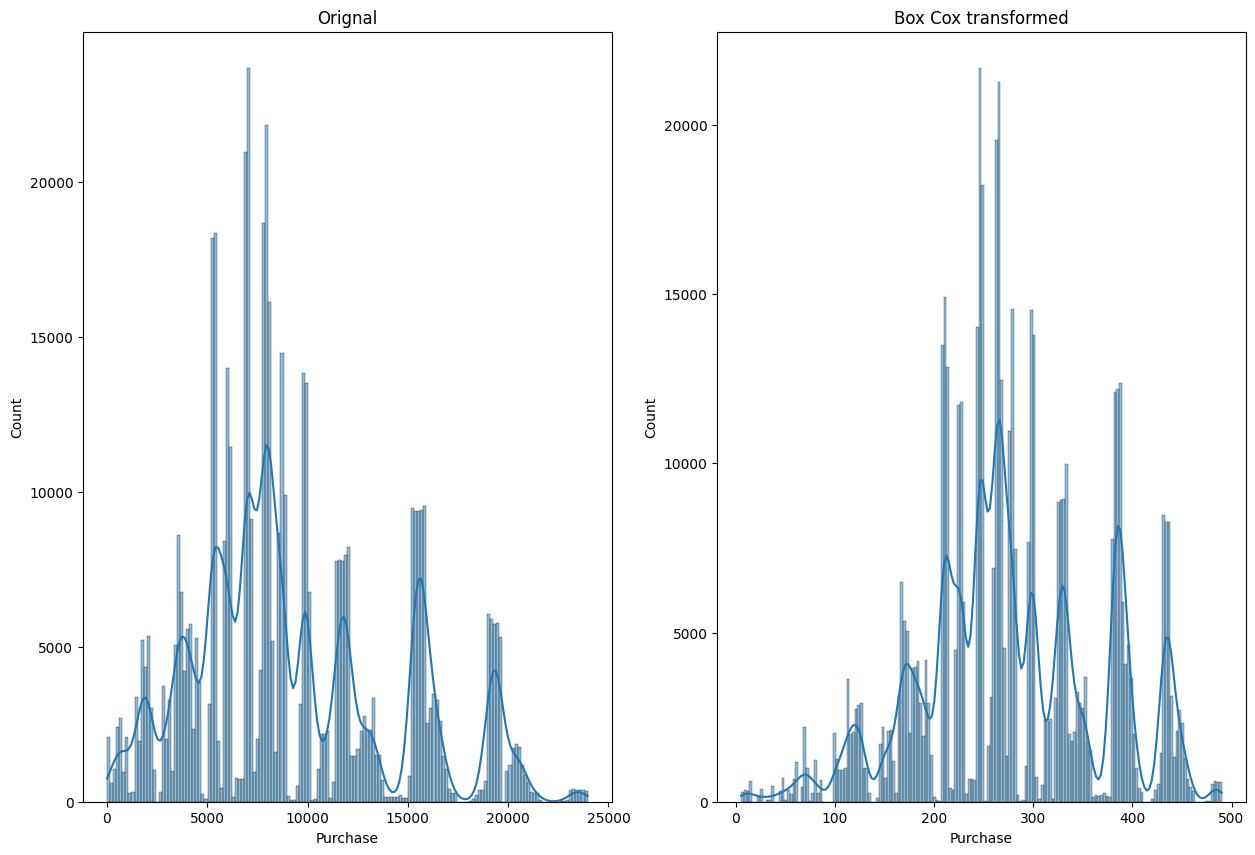

0.5565233768488279


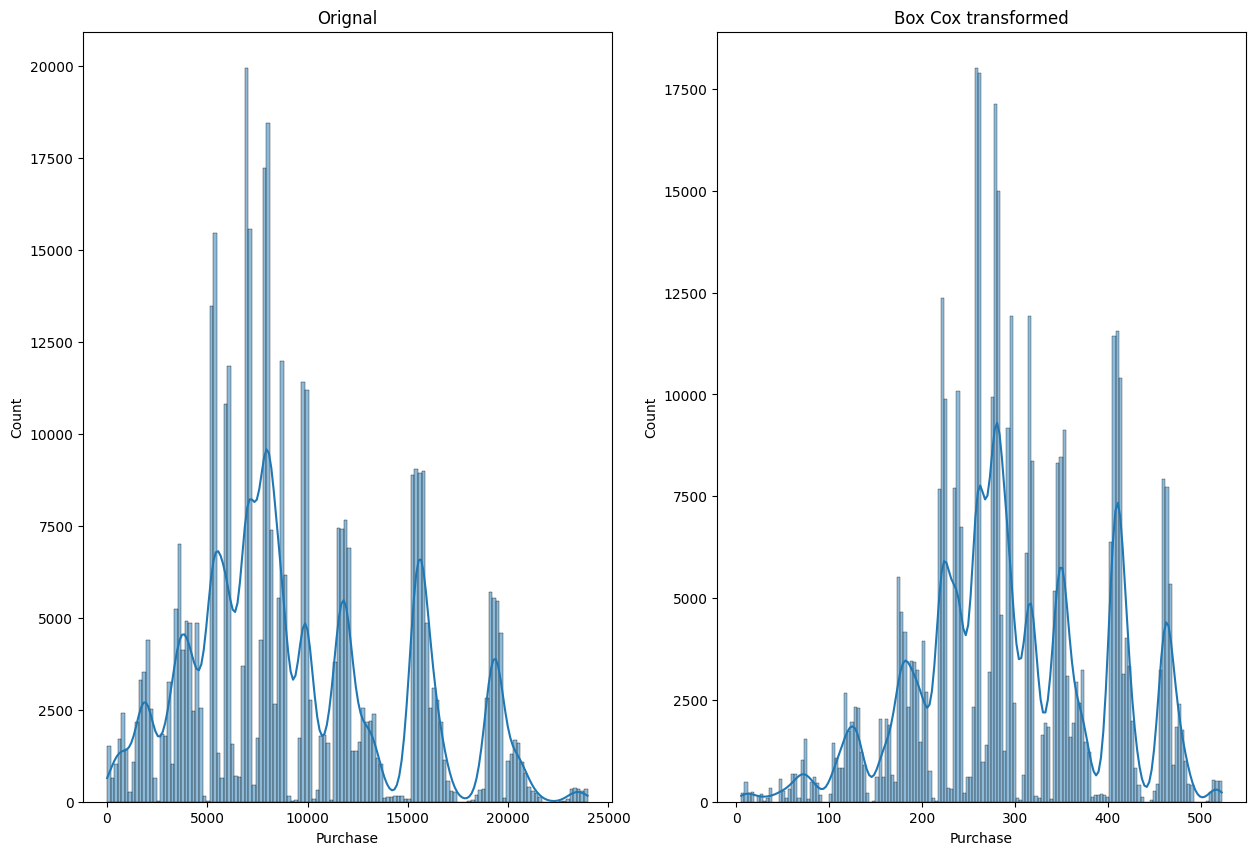

0.5642688865058023


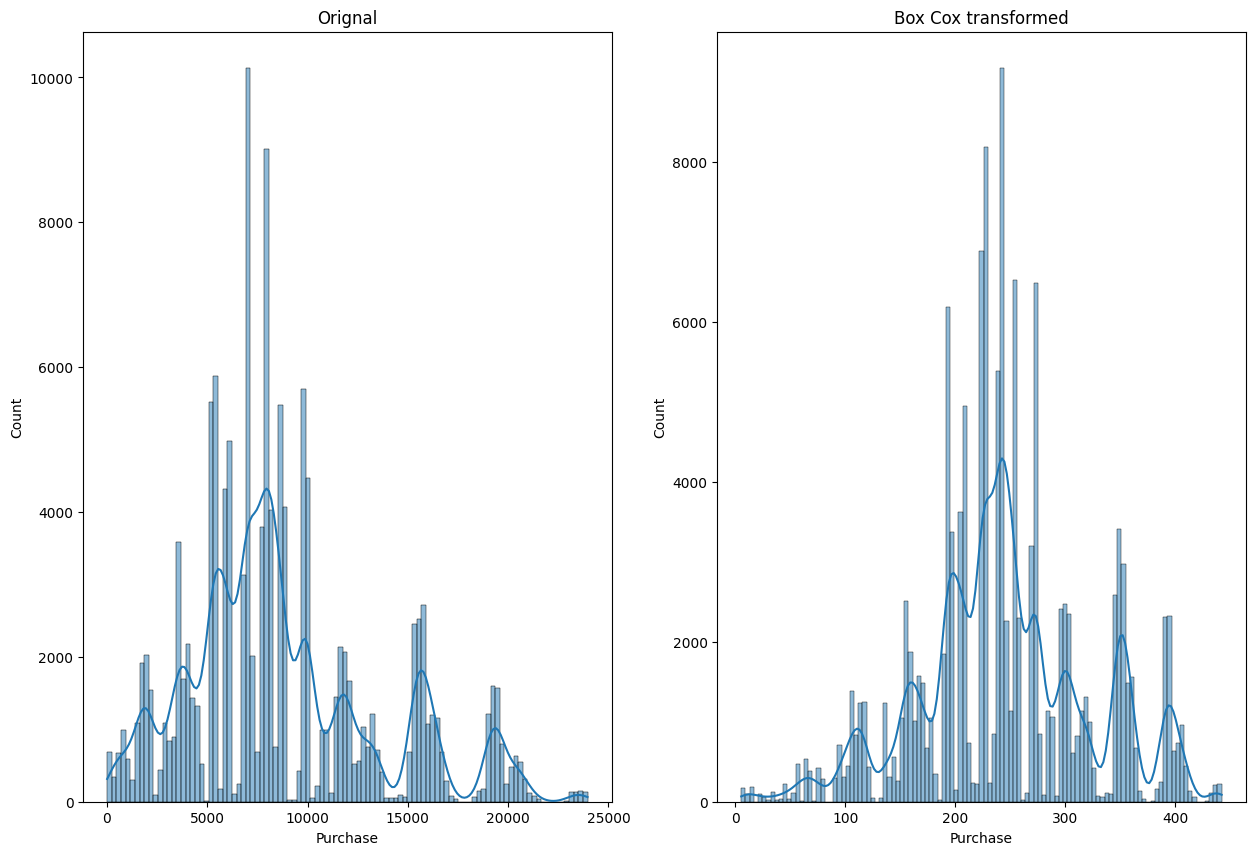

0.5442024373365814


In [21]:
#Box_cox_transformation
def plot_norm(df1,x):
  transformed,best_lambda=boxcox(df1[x])
  plt.figure(figsize=(15,10))
  plt.subplot(1,2,1)
  plt.title('Orignal')
  sns.histplot(data=df1,x=x,kde=True)
  plt.subplot(1,2,2)
  plt.title('Box Cox transformed')
  plt.xlabel('Purchase')
  sns.histplot(x=transformed,kde=True)
  plt.show()
  print(best_lambda)
  return transformed

overall_transformed=plot_norm(df1=df1,x='Purchase')
male_transformed=plot_norm(df1=df1_male,x='Purchase')
female_transformed=plot_norm(df1=df1_female,x='Purchase')

In [22]:
df1_Purchase=df1['Purchase']
df1_male_Purchase=df1_male['Purchase']
df1_female_Purchase=df1_female['Purchase']
std_overall=np.std(df1_Purchase)
std_male=np.std(df1_male_Purchase)
std_female=np.std(df1_female_Purchase)
print("For Orignal")
print('STD overall purchase',std_overall)
print('STD male purchase',std_male)
print('STD female purchase',std_female)

for i in [90,95,99]:
  CI_interval_overall=norm.interval(confidence=i/100,loc=np.mean(df1_Purchase),scale=np.std(df1_Purchase))
  CI_interval_male=norm.interval(confidence=i/100,loc=np.mean(df1_male_Purchase),scale=np.std(df1_male_Purchase))
  CI_interval_female=norm.interval(confidence=i/100,loc=np.mean(df1_female_Purchase),scale=np.std(df1_female_Purchase))
  print('\nCI interval of',i,'% overall purchase',CI_interval_overall)
  print('CI interval of',i,'% male purchase',CI_interval_male)
  print('CI interval of',i,'% female purchase',CI_interval_female)



std_overall=np.std(overall_transformed)
std_male=np.std(male_transformed)
std_female=np.std(female_transformed)
print("\nFor Transformed")
print('STD overall purchase',std_overall)
print('STD male purchase',std_male)
print('STD female purchase',std_female)
for i in [90,95,99]:
  CI_interval_overall=norm.interval(confidence=i/100,loc=np.mean(overall_transformed),scale=np.std(overall_transformed))
  CI_interval_male=norm.interval(confidence=i/100,loc=np.mean(male_transformed),scale=np.std(male_transformed))
  CI_interval_female=norm.interval(confidence=i/100,loc=np.mean(female_transformed),scale=np.std(female_transformed))
  print('\nCI interval of',i,'% overall purchase',CI_interval_overall)
  print('CI interval of',i,'% male purchase',CI_interval_male)
  print('CI interval of',i,'% female purchase',CI_interval_female)


For Orignal
STD overall purchase 5023.060827959972
STD male purchase 5092.180063635943
STD female purchase 4767.215738016988

CI interval of 90 % overall purchase (np.float64(1001.7688916912975), np.float64(17526.16853422695))
CI interval of 90 % male purchase (np.float64(1061.6351937107029), np.float64(17813.416887233827))
CI interval of 90 % female purchase (np.float64(893.1936680180897), np.float64(16575.937862292856))

CI interval of 95 % overall purchase (np.float64(-581.049601996363), np.float64(19108.987027914613))
CI interval of 95 % male purchase (np.float64(-542.9634870470636), np.float64(19418.01556799159))
CI interval of 95 % female purchase (np.float64(-609.0053878903545), np.float64(18078.136918201308))

CI interval of 99 % overall purchase (np.float64(-3674.578561208771), np.float64(22202.515987127023))
CI interval of 99 % male purchase (np.float64(-3679.0605863887013), np.float64(22554.112667333233))
CI interval of 99 % female purchase (np.float64(-3544.96822916818), np

#### Observation

1. The Purchase pattern  of male and female purchase disb is almost same as the purchas pattern of the overall cusotomers

## 2.Product ID

In [23]:
df1.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [24]:
df1['Product_ID'].nunique()

3631

In [25]:
df1['Product_ID'].value_counts()

,count
Product_ID,
P00265242,1880
P00025442,1615
P00110742,1612
P00112142,1562
P00057642,1470
...,...
P00325342,1
P00312542,1
P00008942,1


In [26]:
df2=df1.copy()

In [27]:
product_counts = df1['Product_ID'].value_counts()

# Step 2: Identify Product_IDs that occur only once
products_to_replace = product_counts[product_counts <= 100].index
products_to_replace

Index(['P00189142', 'P00287542', 'P00207042', 'P00001242', 'P00236542',
       'P00359142', 'P00298142', 'P00328942', 'P00354442', 'P00345242',
       ...
       'P00353742', 'P00299742', 'P00156642', 'P00072042', 'P00027842',
       'P00325342', 'P00312542', 'P00008942', 'P00315142', 'P00365942'],
      dtype='object', name='Product_ID', length=2121)

In [28]:
# Step 3: Replace those Product_IDs with 'OTHER' (or any other value)
df2['Product_ID']=df2['Product_ID'].replace(products_to_replace, 'OTHER')

In [29]:
df2['Product_ID'].value_counts()

,count
Product_ID,
OTHER,70013
P00265242,1880
P00025442,1615
P00110742,1612
P00112142,1562
...,...
P00207442,101
P00199142,101
P00348342,101


#### Observation
1. As there is very high range of product id we will try to explore the top 10 productID

In [30]:
df2_temp=df1.copy()

top_10_Product=df2_temp['Product_ID'].value_counts().iloc[:10].index
print(top_10_Product)
df2_temp=df2_temp[df2['Product_ID'].isin(top_10_Product)]
df2_temp.shape

Index(['P00265242', 'P00025442', 'P00110742', 'P00112142', 'P00057642',
       'P00184942', 'P00046742', 'P00058042', 'P00059442', 'P00145042'],
      dtype='object', name='Product_ID')


(15251, 10)

In [31]:
top_10_Product=df2['Product_ID'].value_counts().iloc[:10].index
print(top_10_Product)
df2=df2[df2['Product_ID'].isin(top_10_Product)]
df2.shape

Index(['OTHER', 'P00265242', 'P00025442', 'P00110742', 'P00112142',
       'P00057642', 'P00184942', 'P00046742', 'P00058042', 'P00145042'],
      dtype='object', name='Product_ID')


(83858, 10)

#### Observation
1.  top 10 product only contribute to very less number of transaction or orders so we will take in account of 'others' category created by us also

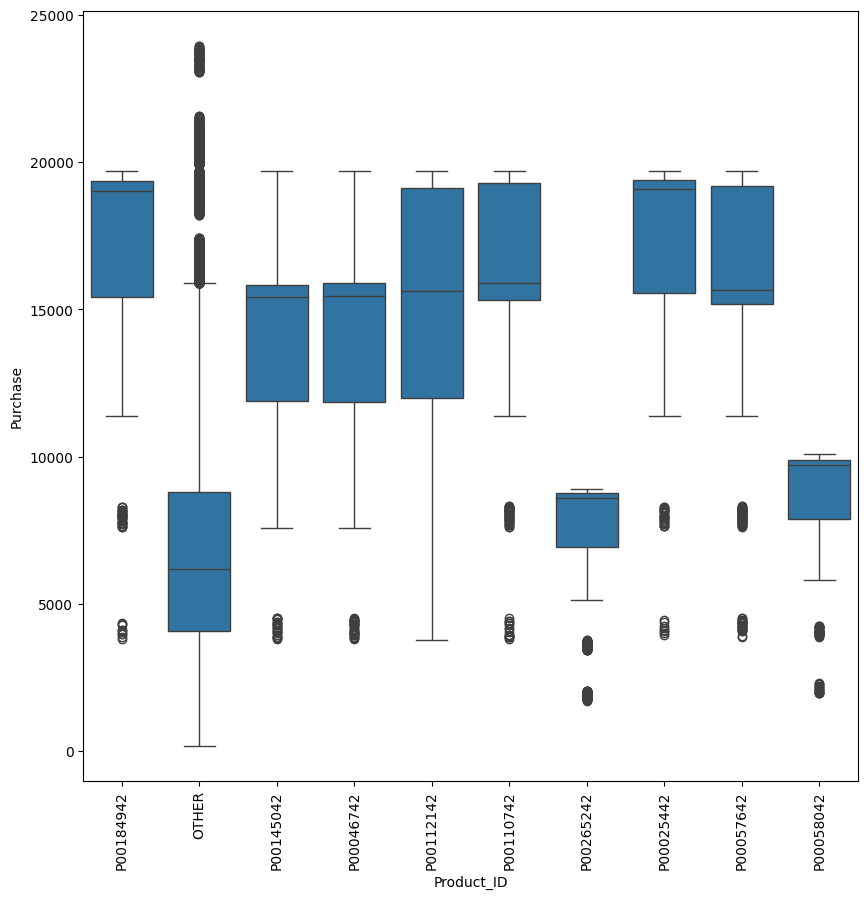

In [32]:
plt.figure(figsize=(10,10))
sns.boxplot(data=df2, x='Product_ID',y='Purchase')
plt.xticks(rotation=90)
plt.show()

In [33]:
product_mean_median_list=[]
print("Product Name :\t Min:\t Max:\t Mean:\t Median:\tStd")
for i in top_10_Product:
  product_list=[]
  product_list.append(i)
  product_list.append(round(np.min(df2['Purchase'][df2['Product_ID']==i]),2))
  product_list.append(round(np.max(df2['Purchase'][df2['Product_ID']==i]),2))
  product_list.append(round(np.mean(df2['Purchase'][df2['Product_ID']==i]),2))
  product_list.append(round(np.median(df2['Purchase'][df2['Product_ID']==i]),2))
  product_list.append(round(np.std(df2['Purchase'][df2['Product_ID']==i]),2))
  product_mean_median_list.append(product_list)

product_mean_median_list=pd.DataFrame(product_mean_median_list,columns=['Product','Min','Max','Mean','Median','Std'])
product_mean_median_list

Product Name :	 Min:	 Max:	 Mean:	 Median:	Std


,Product,Min,Max,Mean,Median,Std
0,OTHER,185,23947,7248.52,6178.0,4400.17
1,P00265242,1720,8907,7534.85,8605.0,1683.54
2,P00025442,3961,19707,17334.47,19084.0,2954.69
3,P00110742,3798,19708,16577.11,15897.0,3265.78
4,P00112142,3793,19706,15503.20,15621.0,3572.88
5,P00057642,3890,19708,15716.18,15647.5,3468.86
6,P00184942,3809,19707,16899.23,19011.5,3141.15
7,P00046742,3804,19707,14709.93,15442.5,3658.27
8,P00058042,1979,10082,8615.07,9712.0,1612.83
9,P00145042,3824,19705,14517.31,15436.5,3541.39


<Axes: xlabel='Purchase', ylabel='Count'>

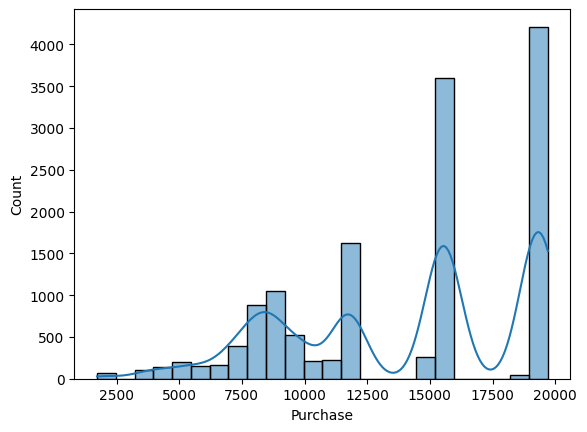

In [34]:
sns.histplot(data=df2[df2['Product_ID']!='OTHER'],x='Purchase',kde=True)

In [35]:
df2.shape

(83858, 10)

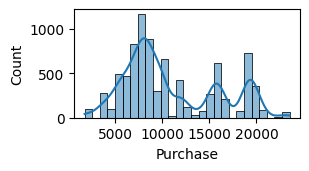

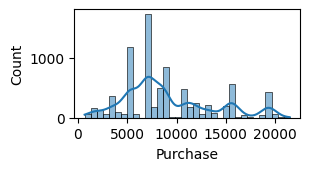

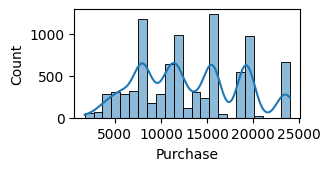

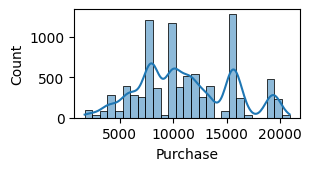

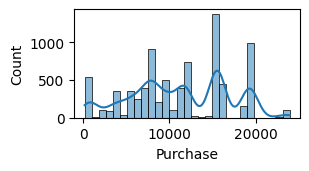

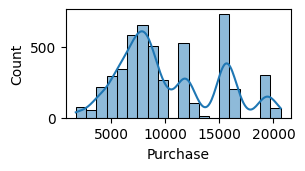

In [36]:
## for random 20 product id
for i in range(1,7):
  Random_Product_id=np.random.choice(df1['Product_ID'],size=20,replace=False)
  df_2_temp=df1[['Product_ID','Purchase']][df1['Product_ID'].isin(Random_Product_id)]
  plt.subplot(3,2,i)
  sns.histplot(data=df_2_temp,x='Purchase',kde=True)
  plt.show()

#### Observation

1. As we can see majority of the mean is lower than the median  for the same productid and also the left skew so it tells us that data is left skewed becauseof the oultier on left side or lower side  that some of the value is very low that is stretching the value towrds the lef

In [37]:
df1.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


## 3.Gender

In [38]:
df1.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


Value wise Gender :	 Gender
M    414259
F    135809
Name: count, dtype: int64


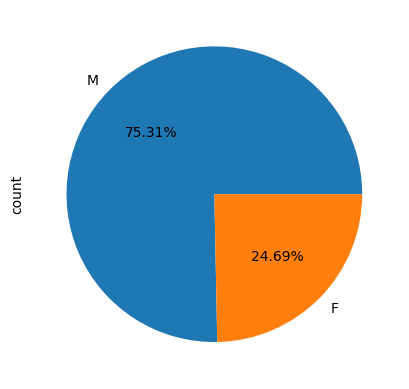

In [39]:
print("Value wise Gender :\t",df1['Gender'].value_counts())
df1['Gender'].value_counts().plot.pie(autopct='%.2f%%')
plt.show()

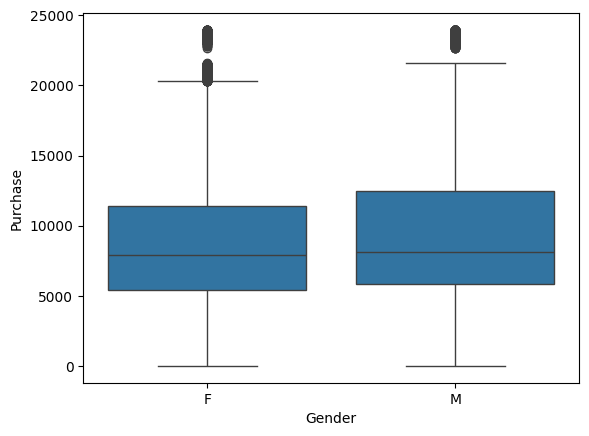

In [40]:
sns.boxplot(data=df1,x='Gender',y='Purchase')
plt.show()

In [41]:

df1.groupby('Gender')['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,135809.0,8734.565765,4767.233289,12.0,5433.0,7914.0,11400.0,23959.0
M,414259.0,9437.526040,5092.186210,12.0,5863.0,8098.0,12454.0,23961.0


#### Observation

1. On average, males spend more than females.

However, this is at the population level, not based on random sampling.

2. Female sample is only 1/3 the size of male in the full population.

Since the female sample is only one-third the size of the male sample in the full population, we will apply the Central Limit Theorem using equal sample sizes for both genders, so that the confidence interval widths are comparable

#### CLT of Purchase

##### 1.CI for sample size 300

###### 1.Male

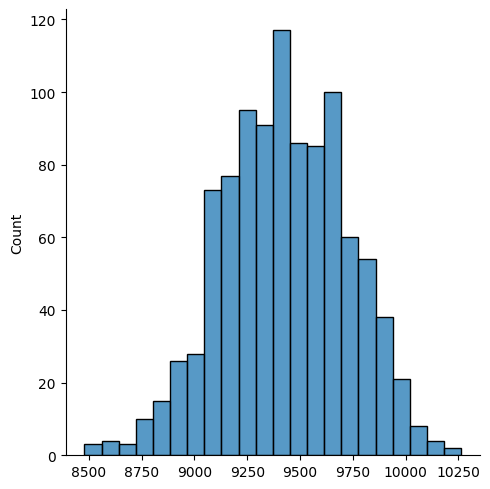

In [42]:
sampling_mean_disb_male=[]
for i in range(1000):
  sample=np.random.choice(df1_male['Purchase'],size=300)
  sampling_mean_disb_male.append(np.mean(sample))

sns.displot(sampling_mean_disb_male,)
plt.show()

In [43]:
mean_male=np.mean(sampling_mean_disb_male)
std_male=np.std(sampling_mean_disb_male)
print(mean_male)
print(std_male)

9426.507380000001
295.0921509086084


In [44]:
print(norm.interval(confidence=.90,loc=mean_male,scale=std_male))
print(norm.interval(confidence=.95,loc=mean_male,scale=std_male))
print(norm.interval(confidence=.99,loc=mean_male,scale=std_male))

(np.float64(8941.123985293065), np.float64(9911.890774706937))
(np.float64(8848.13739209867), np.float64(10004.877367901332))
(np.float64(8666.400370442334), np.float64(10186.614389557668))


###### 2.Female

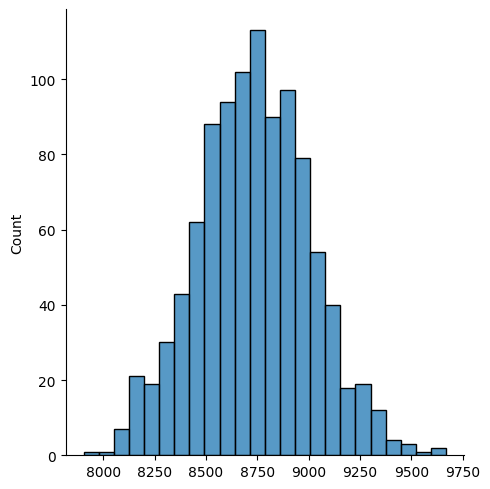

In [45]:
sampling_mean_disb_female=[]
for i in range(1000):
  sample_female=np.random.choice(df1_female['Purchase'],size=300)
  sampling_mean_disb_female.append(np.mean(sample_female))

sns.displot(sampling_mean_disb_female,)
plt.show()

In [46]:
mean_female=np.mean(sampling_mean_disb_female)
std_female=np.std(sampling_mean_disb_female)

print(mean_female)
print(std_female)

8736.115003333334
273.49141103316407


In [47]:
print(norm.interval(confidence=.90,loc=mean_female,scale=std_female))
print(norm.interval(confidence=.95,loc=mean_female,scale=std_female))
print(norm.interval(confidence=.99,loc=mean_female,scale=std_female))

(np.float64(8286.261663955358), np.float64(9185.96834271131))
(np.float64(8200.081687627293), np.float64(9272.148319039376))
(np.float64(8031.647812525173), np.float64(9440.582194141496))


###### Observation
1. Although male average spending is higher, the confidence intervals for both groups overlap at all levels (90%, 95%, 99%).

2. This suggests:
The difference might not be statistically significant — i.e., we cannot be fully confident that males spend more based solely on the intervals.


##### 2.CI for sample size 500

###### 1.Male

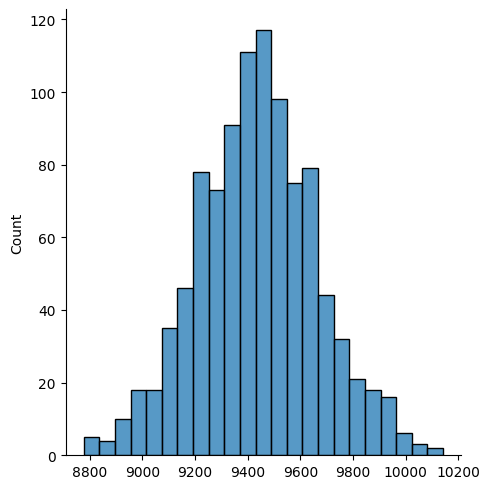

In [48]:
sampling_mean_disb_male=[]
for i in range(1000):
  sample=np.random.choice(df1_male['Purchase'],size=500)
  sampling_mean_disb_male.append(np.mean(sample))

sns.displot(sampling_mean_disb_male,)
plt.show()

In [49]:
mean_male=np.mean(sampling_mean_disb_male)
std_male=np.std(sampling_mean_disb_male)
print(mean_male)
print(std_male)

9435.447004000001
227.86154003245036


In [50]:
print(norm.interval(confidence=.90,loc=mean_male,scale=std_male))
print(norm.interval(confidence=.95,loc=mean_male,scale=std_male))
print(norm.interval(confidence=.99,loc=mean_male,scale=std_male))

(np.float64(9060.648123434878), np.float64(9810.245884565125))
(np.float64(8988.846592074568), np.float64(9882.047415925435))
(np.float64(8848.514572032635), np.float64(10022.379435967368))


###### 2.Female

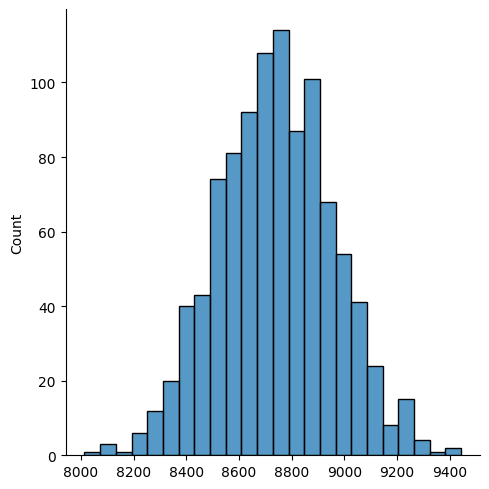

In [51]:
sampling_mean_disb_female=[]
for i in range(1000):
  sample_female=np.random.choice(df1_female['Purchase'],size=500)
  sampling_mean_disb_female.append(np.mean(sample_female))

sns.displot(sampling_mean_disb_female,)
plt.show()

In [52]:
mean_female=np.mean(sampling_mean_disb_female)
std_female=np.std(sampling_mean_disb_female)

print(mean_female)
print(std_female)

8738.809384
218.71192483951248


In [53]:
print(norm.interval(confidence=.90,loc=mean_female,scale=std_female))
print(norm.interval(confidence=.95,loc=mean_female,scale=std_female))
print(norm.interval(confidence=.99,loc=mean_female,scale=std_female))

(np.float64(8379.06028117019), np.float64(9098.55848682981))
(np.float64(8310.141888325124), np.float64(9167.476879674876))
(np.float64(8175.444798962799), np.float64(9302.173969037201))


###### Observation
1. Although male average spending is higher, the confidence intervals for both groups overlap at all levels (90%, 95%, 99%).




#### 📊 Interpretation and Final Inference on Purchase
1. Mean Comparison

  1. Males consistently show a higher mean spending than females (by about 700–750 units) across both sample sizes (300 and 500).

  2. The mean difference is relatively stable across different sample sizes → that adds to the reliability of the observed pattern.

2. Confidence Interval Overlap

  Let’s focus on the 95% confidence intervals for sample size 500:

  1. Male: (8990.03, 9876.22)

  2. Female: (8324.06, 9170.05)

 These intervals overlap between 8990.03 and 9170.05 — about 180 units of overlap.

 That’s less overlap than in the 300-sample case, meaning the evidence for a true difference is getting stronger as sample size increases.

3. Trend Across Sample Sizes

  1. From 300 → 500 samples, the width of the CIs shrinks (as expected), because standard error decreases with larger 𝑛.

  2. The overlap between male and female CIs decreases → this suggests the difference in means is becoming more distinguishable as data grows.

**Final Inference:**

As the sample size increases from 300 to 500, the confidence intervals for male and female spending narrow, and the overlap between them reduces, indicating increasing statistical evidence that males spend more on average than females.




#### 2. Gender vs Age

In [54]:



 ##📌 Step 3: Create a two-way contingency table (Gender vs Age)
contingency_table = pd.crosstab(df1['Gender'],df1['Age'], margins=True)
print("Two-Way Contingency Table:\n")
print(contingency_table)

# 📌 Step 4: Compute marginal probabilities
total = contingency_table.loc['All', 'All']
print(total)
marginal_probs = contingency_table / total
print("\n📊 Marginal Probabilities:\n")
print(round(marginal_probs,2))

# 📌 Step 5: Conditional Probabilities
# Probability of Gender given Age
cond_prob_age_given_gender =pd.crosstab(df1['Gender'],df1['Age'], normalize='index')
print("\n🎯 P(Age | Gender):\n")
print(round(cond_prob_age_given_gender,2))

# Probability of Age given Gender
cond_prob_gendre_given_age = pd.crosstab(df1['Age'],df1['Gender'],normalize='index')
print("\n🌍 P(Gender | Age):\n")
print(round(cond_prob_gendre_given_age,2))

Two-Way Contingency Table:

Age      0-17  18-25   26-35   36-45  46-50  51-55    55+     All
Gender                                                           
F        5083  24628   50752   27170  13199   9894   5083  135809
M       10019  75032  168835   82843  32502  28607  16421  414259
All     15102  99660  219587  110013  45701  38501  21504  550068
550068

📊 Marginal Probabilities:

Age     0-17  18-25  26-35  36-45  46-50  51-55   55+   All
Gender                                                     
F       0.01   0.04   0.09   0.05   0.02   0.02  0.01  0.25
M       0.02   0.14   0.31   0.15   0.06   0.05  0.03  0.75
All     0.03   0.18   0.40   0.20   0.08   0.07  0.04  1.00

🎯 P(Age | Gender):

Age     0-17  18-25  26-35  36-45  46-50  51-55   55+
Gender                                               
F       0.04   0.18   0.37    0.2   0.10   0.07  0.04
M       0.02   0.18   0.41    0.2   0.08   0.07  0.04

🌍 P(Gender | Age):

Gender     F     M
Age               
0-17    0.3

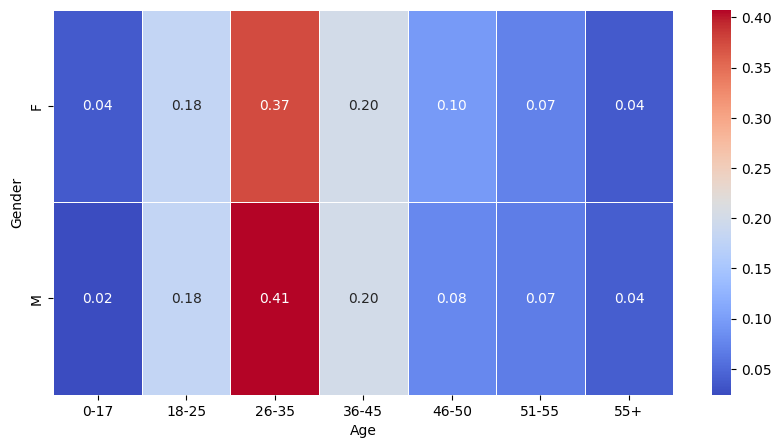

In [55]:
plt.figure(figsize=(10,5))
sns.heatmap(data=cond_prob_age_given_gender,cmap='coolwarm',annot=True,fmt='.2f', linewidths=0.5)
plt.show()

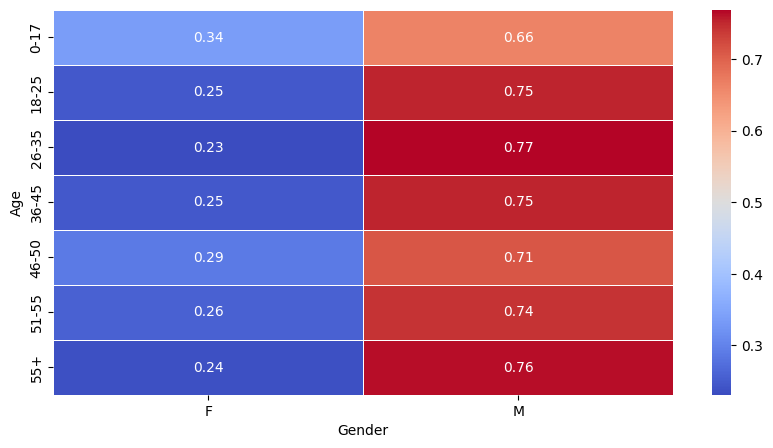

In [56]:
plt.figure(figsize=(10,5))
sns.heatmap(data=cond_prob_gendre_given_age,cmap='coolwarm',annot=True,fmt='.2f', linewidths=0.5)
plt.show()

#### 2. Gender vs City Category

In [57]:



 ##📌 Step 3: Create a two-way contingency table (Gender vs City_Category)
contingency_table = pd.crosstab(df1['Gender'],df1['City_Category'], margins=True)
print("Two-Way Contingency Table:\n")
print(contingency_table)

# 📌 Step 4: Compute marginal probabilities
total = contingency_table.loc['All', 'All']
print(total)
marginal_probs = contingency_table / total
print("\n📊 Marginal Probabilities:\n")
print(round(marginal_probs,2))

# 📌 Step 5: Conditional Probabilities
# Probability of Gender given City_Category
cond_prob_City_given_gender =pd.crosstab(df1['Gender'],df1['City_Category'], normalize='index')
print("\n🎯 P(City_Category | Gender):\n")
print(round(cond_prob_City_given_gender,2))

# Probability of Age given City_Category
cond_prob_gendre_given_city = pd.crosstab(df1['City_Category'],df1['Gender'],normalize='index')
print("\n🌍 P(Gender | City_Category):\n")
print(round(cond_prob_gendre_given_city ,2))

Two-Way Contingency Table:

City_Category       A       B       C     All
Gender                                       
F               35704   57796   42309  135809
M              112016  173377  128866  414259
All            147720  231173  171175  550068
550068

📊 Marginal Probabilities:

City_Category     A     B     C   All
Gender                               
F              0.06  0.11  0.08  0.25
M              0.20  0.32  0.23  0.75
All            0.27  0.42  0.31  1.00

🎯 P(City_Category | Gender):

City_Category     A     B     C
Gender                         
F              0.26  0.43  0.31
M              0.27  0.42  0.31

🌍 P(Gender | City_Category):

Gender            F     M
City_Category            
A              0.24  0.76
B              0.25  0.75
C              0.25  0.75


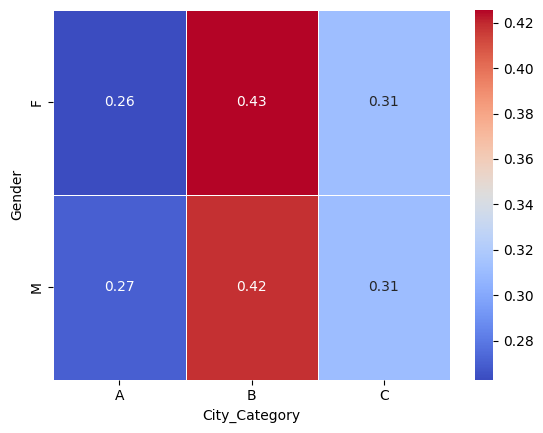

In [58]:

sns.heatmap(data=cond_prob_City_given_gender,cmap='coolwarm',annot=True,fmt='.2f', linewidths=0.5)
plt.show()

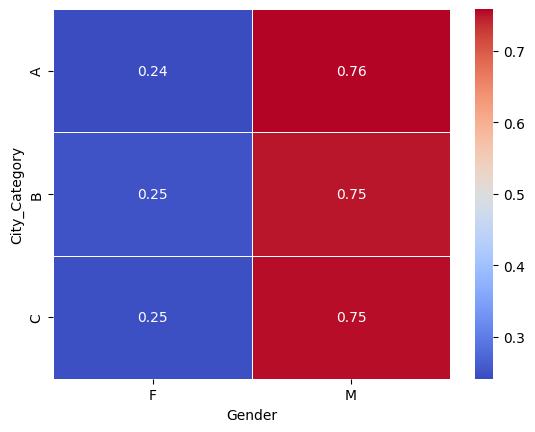

In [59]:

sns.heatmap(data=cond_prob_gendre_given_city,cmap='coolwarm',annot=True,fmt='.2f', linewidths=0.5)
plt.show()

#### 2. Gender vs Stay in Current City Years

In [60]:
df1['Stay_In_Current_City_Years'].value_counts()

,count
Stay_In_Current_City_Years,
1,193821
2,101838
3,95285
4+,84726
0,74398


In [61]:



 ##📌 Step 3: Create a two-way contingency table (Gender vs Stay_In_Current_City_Years)
contingency_table = pd.crosstab(df1['Gender'],df1['Stay_In_Current_City_Years'], margins=True)
print("Two-Way Contingency Table:\n")
print(contingency_table)

# 📌 Step 4: Compute marginal probabilities
total = contingency_table.loc['All', 'All']
print(total)
marginal_probs = contingency_table / total
print("\n📊 Marginal Probabilities:\n")
print(round(marginal_probs,2))

# 📌 Step 5: Conditional Probabilities
# Probability of Stay_In_Current_City_Years given Gender
cond_prob_stay_city_given_gender =pd.crosstab(df1['Gender'],df1['Stay_In_Current_City_Years'], normalize='index')
print("\n🎯 P(Stay_In_Current_City_Years | Gender):\n")
print(round(cond_prob_stay_city_given_gender,2))

# Probability of Gender given Stay_In_Current_City_Years
cond_prob_gendre_given_stay_city = pd.crosstab(df1['Stay_In_Current_City_Years'],df1['Gender'],normalize='index')
print("\n🌍 P(Gender | Stay_In_Current_City_Years):\n")
print(round(cond_prob_gendre_given_stay_city,2))

Two-Way Contingency Table:

Stay_In_Current_City_Years      0       1       2      3     4+     All
Gender                                                                 
F                           17063   51298   24332  24520  18596  135809
M                           57335  142523   77506  70765  66130  414259
All                         74398  193821  101838  95285  84726  550068
550068

📊 Marginal Probabilities:

Stay_In_Current_City_Years     0     1     2     3    4+   All
Gender                                                        
F                           0.03  0.09  0.04  0.04  0.03  0.25
M                           0.10  0.26  0.14  0.13  0.12  0.75
All                         0.14  0.35  0.19  0.17  0.15  1.00

🎯 P(Stay_In_Current_City_Years | Gender):

Stay_In_Current_City_Years     0     1     2     3    4+
Gender                                                  
F                           0.13  0.38  0.18  0.18  0.14
M                           0.14  0.34  0.19  0

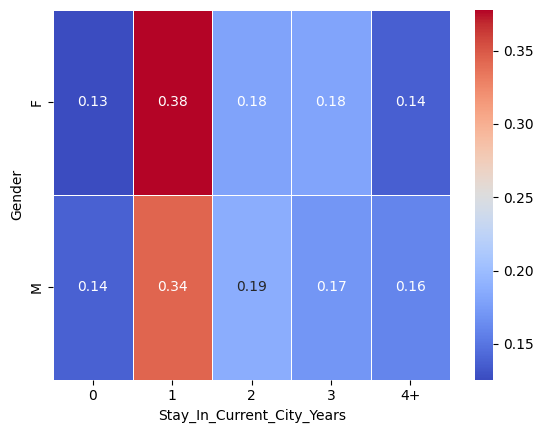

In [62]:

sns.heatmap(data=cond_prob_stay_city_given_gender,cmap='coolwarm',annot=True,fmt='.2f', linewidths=0.5)
plt.show()

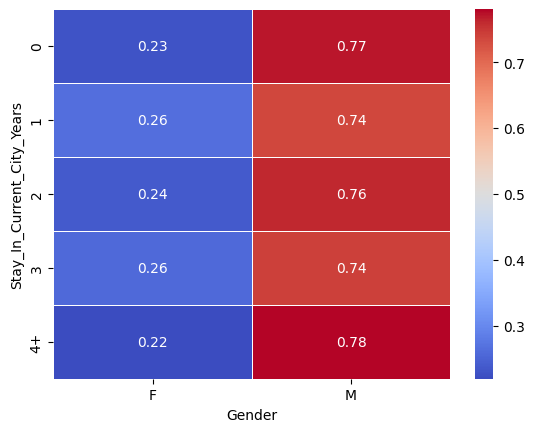

In [63]:

sns.heatmap(data=cond_prob_gendre_given_stay_city,cmap='coolwarm',annot=True,fmt='.2f', linewidths=0.5)
plt.show()

#### 2. Gender vs Marital Status

In [64]:


 ##📌 Step 3: Create a two-way contingency table (Gender vs Marital_Status)
contingency_table = pd.crosstab(df1['Gender'],df1['Marital_Status'], margins=True)
print("Two-Way Contingency Table:\n")
print(contingency_table)

# 📌 Step 4: Compute marginal probabilities
total = contingency_table.loc['All', 'All']
print(total)
marginal_probs = contingency_table / total
print("\n📊 Marginal Probabilities:\n")
print(round(marginal_probs,2))

# 📌 Step 5: Conditional Probabilities
# Probability of Marital_Status given Gender
cond_prob_ms_given_gender =pd.crosstab(df1['Gender'],df1['Marital_Status'], normalize='index')
print("\n🎯 P(Marital_Status | Gender):\n")
print(round(cond_prob_ms_given_gender,2))

# Probability of Gender given Marital_Status
cond_prob_gendre_given_ms = pd.crosstab(df1['Marital_Status'],df1['Gender'],normalize='index')
print("\n🌍 P(Gender | Marital_Status):\n")
print(round(cond_prob_gendre_given_ms,2))

Two-Way Contingency Table:

Marital_Status       0       1     All
Gender                                
F                78821   56988  135809
M               245910  168349  414259
All             324731  225337  550068
550068

📊 Marginal Probabilities:

Marital_Status     0     1   All
Gender                          
F               0.14  0.10  0.25
M               0.45  0.31  0.75
All             0.59  0.41  1.00

🎯 P(Marital_Status | Gender):

Marital_Status     0     1
Gender                    
F               0.58  0.42
M               0.59  0.41

🌍 P(Gender | Marital_Status):

Gender             F     M
Marital_Status            
0               0.24  0.76
1               0.25  0.75


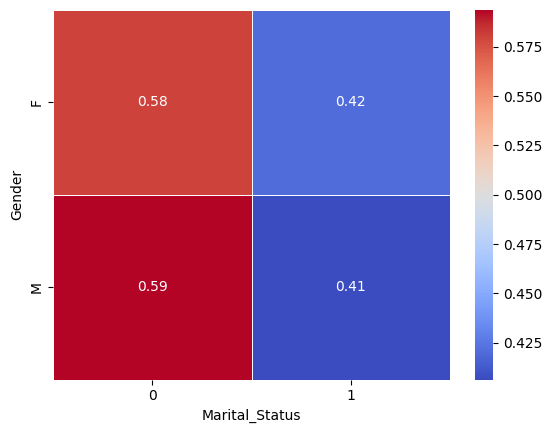

In [65]:

sns.heatmap(data=cond_prob_ms_given_gender,cmap='coolwarm',annot=True,fmt='.2f', linewidths=0.5)
plt.show()

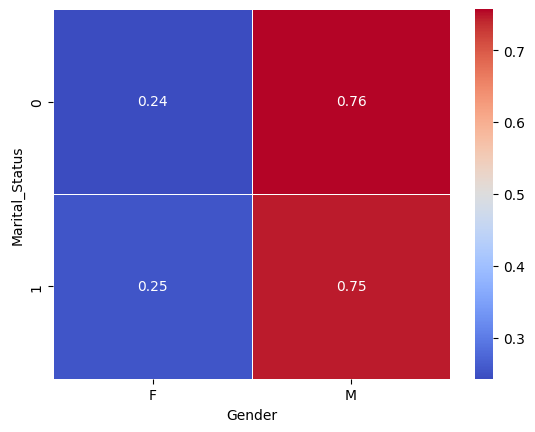

In [66]:

sns.heatmap(data=cond_prob_gendre_given_ms,cmap='coolwarm',annot=True,fmt='.2f', linewidths=0.5)
plt.show()

#### 2. Gender vs Product_Category

In [67]:
df1.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category',
       'Purchase'],
      dtype='object')

In [68]:


 ##📌 Step 3: Create a two-way contingency table (Gender vs Product_Category)
contingency_table = pd.crosstab(df1['Gender'],df1['Product_Category'], margins=True)
print("Two-Way Contingency Table:\n")
print(contingency_table)

# 📌 Step 4: Compute marginal probabilities
total = contingency_table.loc['All', 'All']
print(total)
marginal_probs = contingency_table / total
print("\n📊 Marginal Probabilities:\n")
print(round(marginal_probs,2))

# 📌 Step 5: Conditional Probabilities
# Probability of Product_Category given Gender
cond_prob_pc_given_gender =pd.crosstab(df1['Gender'],df1['Product_Category'], normalize='index')
print("\n🎯 P(Product_Category | Gender):\n")
print(round(cond_prob_pc_given_gender,2))

# Probability of Gender given Product_Category
cond_prob_gendre_given_pc = pd.crosstab(df1['Product_Category'],df1['Gender'],normalize='index')
print("\n🌍 P(Gender | Product_Category):\n")
print(round(cond_prob_gendre_given_pc,2))

Two-Way Contingency Table:

Product_Category       1      2      3      4       5      6     7       8  \
Gender                                                                       
F                  24831   5658   6006   3639   41961   4559   943   33558   
M                 115547  18206  14207   8114  108972  15907  2778   80367   
All               140378  23864  20213  11753  150933  20466  3721  113925   

Product_Category    9    10  ...    12    13    14    15    16   17    18  \
Gender                       ...                                            
F                  70  1162  ...  1532  1462   623  1046  2402   62   382   
M                 340  3963  ...  2415  4087   900  5244  7426  516  2743   
All               410  5125  ...  3947  5549  1523  6290  9828  578  3125   

Product_Category    19    20     All  
Gender                                
F                  451   723  135809  
M                 1152  1827  414259  
All               1603  2550  550068  


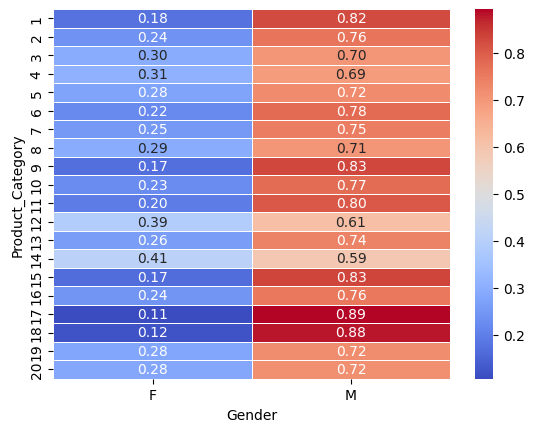

In [69]:

sns.heatmap(data=cond_prob_gendre_given_pc,cmap='coolwarm',annot=True,fmt='.2f', linewidths=0.5)
plt.show()

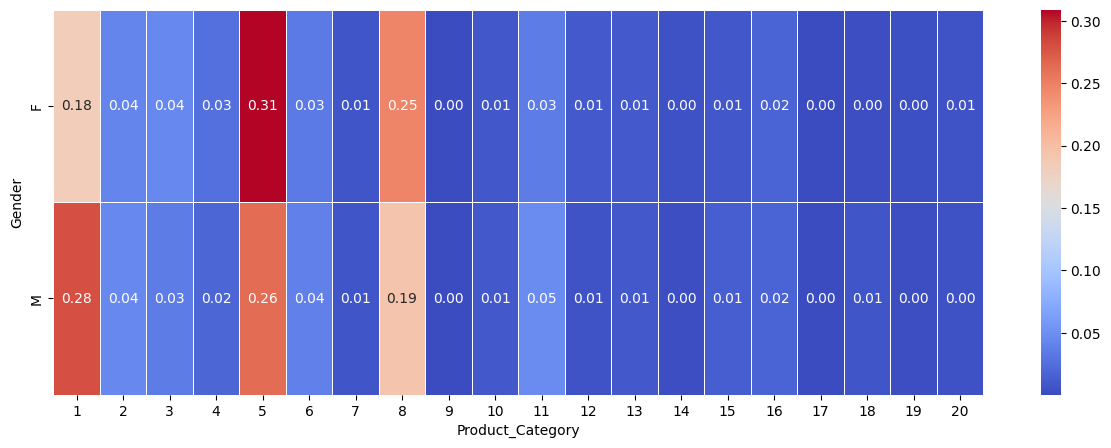

In [70]:
plt.figure(figsize=(15,5))
sns.heatmap(data=cond_prob_pc_given_gender,cmap='coolwarm',annot=True,fmt='.2f', linewidths=0.5)
plt.show()

In [71]:
df1.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


As a structured approach, we will first perform univariate analysis of features such as product category (which has high variability), marital status, duration of stay in the current city, and city category in relation to purchase behavior. Based on the insights obtained, we will then proceed with bivariate analysis by combining age with each of these variables to explore joint influences on customer purchasing patterns.

## 4.Age

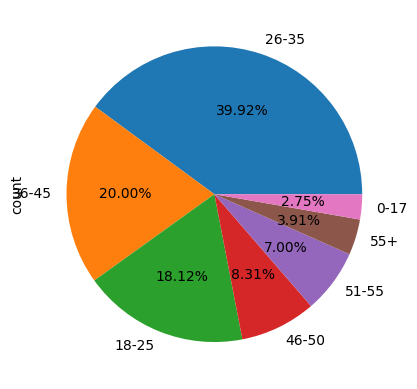

In [72]:
df1['Age'].value_counts().plot.pie(autopct='%.2f%%')
plt.show()

In [73]:
df1.groupby('Age')['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Age,,,,,,,,
0-17,15102.0,8933.464640,5111.114046,12.0,5328.0,7986.0,11874.0,23955.0
18-25,99660.0,9169.663606,5034.321997,12.0,5415.0,8027.0,12028.0,23958.0
26-35,219587.0,9252.690633,5010.527303,12.0,5475.0,8030.0,12047.0,23961.0
36-45,110013.0,9331.350695,5022.923879,12.0,5876.0,8061.0,12107.0,23960.0
46-50,45701.0,9208.625697,4967.216367,12.0,5888.0,8036.0,11997.0,23960.0
51-55,38501.0,9534.808031,5087.368080,12.0,6017.0,8130.0,12462.0,23960.0
55+,21504.0,9336.280459,5011.493996,12.0,6018.0,8105.5,11932.0,23960.0


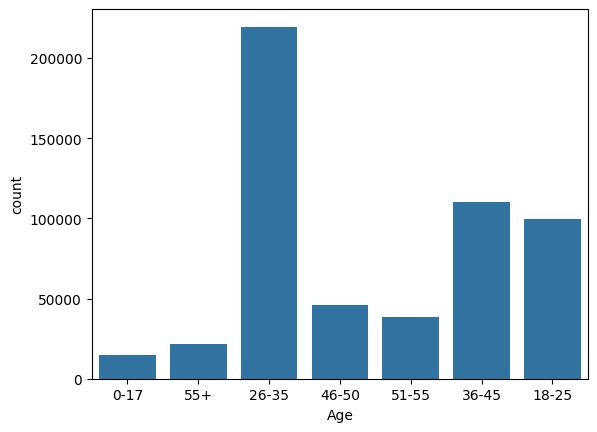

In [74]:
sns.countplot(data=df1,x='Age')
plt.show()

<Axes: xlabel='Age', ylabel='Purchase'>

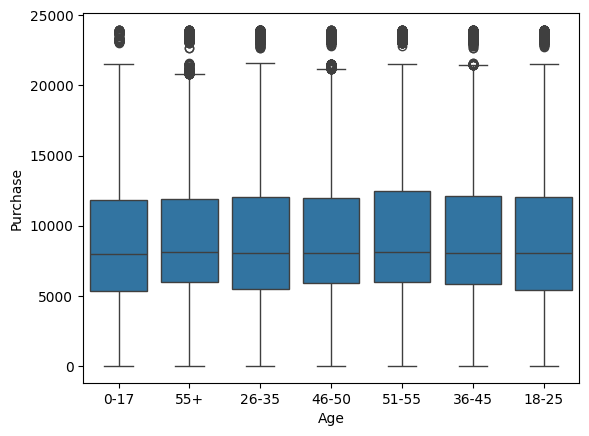

In [75]:
sns.boxplot(data=df1,x='Age',y='Purchase')

#### Observation

1. On average, all age group  spend almost equal amount of mony having same mean and IQR.

However, this is at the population level, not based on random sampling.

2. The means of age groups look similar (8,900–9,500),

  And the IQRs and stds are also close,

  we cannot directly conclude there's no difference, because the number of observations is different.

3. CLT lets you:

  1. Taking equal-sized samples (e.g., 300 or 500) from each age group.
  2. Compute the sampling distribution of the mean,

  3. Then calculate confidence intervals and compare them.



**Although the average spending across age groups appears similar, the group sizes vary significantly. To ensure a fair comparison and reduce the effect of unequal sample sizes, we apply the Central Limit Theorem by drawing equal-sized random samples from each age group. This allows us to estimate the sampling distribution of the mean and construct reliable confidence intervals, making any observed differences in spending more statistically valid**

In [76]:
age_group_dfs = {group: df1[df1['Age'] == group].copy() for group in df1['Age'].unique()}

In [77]:
age_group_dfs.keys()

dict_keys(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'])

#### CLT of Purchase

##### 1.CI for sample size 300

###### 1. 0-17

In [78]:

for x in age_group_dfs.keys():
  print(x)

0-17
55+
26-35
46-50
51-55
36-45
18-25


In [79]:
from scipy.stats import expon

expon.cdf(x=20,scale=50)

np.float64(0.3296799539643607)

In [80]:
1-2.178**(-20*50)

1.0

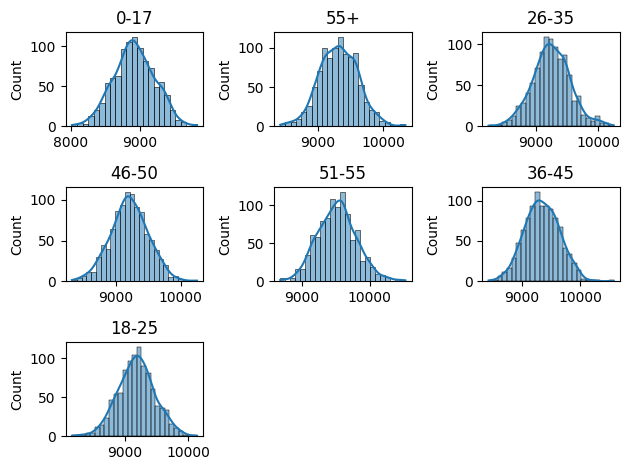

,Age_group,Mean,STD,CI90,CI95,CI99
0,0-17,8917.594260,296.146946,"(8430.47588208735, 9404.71263791265)","(8337.156912096987, 9498.031607903013)","(8154.770278847282, 9680.418241152718)"
6,18-25,9184.758120,288.169219,"(8710.761934545684, 9658.754305454317)","(8619.956828822718, 9749.559411177283)","(8442.483400682591, 9927.03283931741)"
2,26-35,9254.695440,299.244658,"(8762.481779326938, 9746.909100673065)","(8668.186688211665, 9841.204191788338)","(8483.892281594612, 10025.498598405391)"
5,36-45,9342.992800,296.864478,"(8854.694187393095, 9831.2914126069)","(8761.149115717786, 9924.83648428221)","(8578.32057955066, 10107.665020449336)"
3,46-50,9207.192627,293.780322,"(8723.966999116585, 9690.418254216747)","(8631.393776917183, 9782.991476416151)","(8450.464665421743, 9963.92058791159)"
4,51-55,9521.214730,286.762778,"(9049.53193515053, 9992.89752484947)","(8959.170013750345, 10083.259446249655)","(8782.562764229095, 10259.866695770905)"
1,55+,9321.001503,292.372820,"(8840.091010397005, 9801.911996269664)","(8747.961306626265, 9894.041700040405)","(8567.899026740693, 10074.103979925976)"


In [81]:
CLT_CI_Age_groups=[]
z=1
for x in age_group_dfs.keys():
  sampling_mean_disb_0_17=[]
  for i in range(1000):
    sample=np.random.choice(age_group_dfs[x]['Purchase'],size=300)
    sampling_mean_disb_0_17.append(np.mean(sample))

  plt.subplot(3,3,z)
  sns.histplot(data=sampling_mean_disb_0_17,kde=True)
  plt.title(x)
  z=z+1
  mean_0_17=np.mean(sampling_mean_disb_0_17)
  std_0_17=np.std(sampling_mean_disb_0_17)
  CI_90=norm.interval(confidence=.90,loc=mean_0_17,scale=std_0_17)
  CI_95=norm.interval(confidence=.95,loc=mean_0_17,scale=std_0_17)
  CI_99=norm.interval(confidence=.99,loc=mean_0_17,scale=std_0_17)
  CLT_CI_Age_groups.append([x,mean_0_17,std_0_17,CI_90,CI_95,CI_99])
CLT_CI_Age_groups_df=pd.DataFrame(CLT_CI_Age_groups,columns=["Age_group",'Mean','STD','CI90','CI95','CI99'])
plt.tight_layout()
plt.show()
CLT_CI_Age_groups_df.head(7).sort_values(by='Age_group')

###### **Observation**
1.  All Means Are Similar
  
  The means across age groups range from ~8931 (0–17) to ~9525 (51–55).

  Suggests spending behavior is broadly similar across age groups, with some variation.

2. 51–55 Age Group Has the Highest Mean
  Mean = 9525.57, noticeably higher than other groups.

  Its confidence intervals also lie slightly above the rest — suggesting this difference might be statistically significant.

3. Overlapping Confidence Intervals

  Most age groups’ confidence intervals overlap, especially at the 95% level.

  This implies that differences in mean spending between most age groups are not statistically significant.

4. Tighter Intervals → Stable Estimates
  Standard deviations of sample means (~280–300) are relatively small due to CLT and large sample size.

This means your estimates of the population mean for each age group are reliable.

**✅ Final Inference:**


  **With sample size = 300 and 1000 repetitions, the Central Limit Theorem ensures that the sampling distribution of the mean is approximately normal.**
  
  **The differences in mean spending between age groups are modest, and mostly not statistically significant — except possibly for the 51–55 age group, which shows consistently higher mean and CIs.**

##### 2.CI for sample size 500

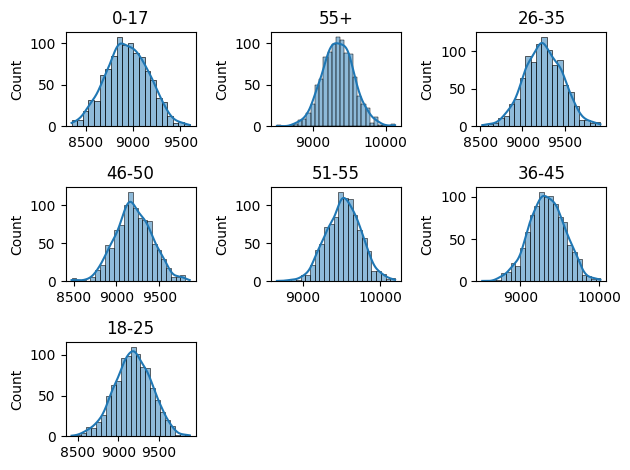

,Age_group,Mean,STD,CI90,CI95,CI99
0,0-17,8938.301142,222.708097,"(8571.978921045822, 9304.623362954175)","(8501.801292990582, 9374.800991009415)","(8364.643099841138, 9511.959184158859)"
6,18-25,9179.230860,228.624007,"(8803.177833484127, 9555.283886515872)","(8731.136041001166, 9627.325678998834)","(8590.334444224025, 9768.127275775974)"
2,26-35,9248.159124,226.641048,"(8875.367774923307, 9620.950473076693)","(8803.95083338596, 9692.36741461404)","(8664.370472336832, 9831.947775663168)"
5,36-45,9335.298054,227.470206,"(8961.14286035966, 9709.453247640342)","(8889.464642353025, 9781.131465646977)","(8749.373631265797, 9921.222476734205)"
3,46-50,9200.623274,215.229502,"(8846.60224776531, 9554.64430023469)","(8778.781202571492, 9622.465345428507)","(8646.228816945571, 9755.017731054428)"
4,51-55,9527.021710,224.851101,"(9157.174560831729, 9896.86885916827)","(9086.32164995994, 9967.721770040058)","(8947.843654851535, 10106.199765148463)"
1,55+,9347.450028,219.539359,"(8986.339917307807, 9708.56013869219)","(8917.16079143023, 9777.73926456977)","(8781.954114146154, 9912.945941853844)"


In [82]:
CLT_CI_Age_groups=[]
z=1
for x in age_group_dfs.keys():
  sampling_mean_disb_0_17=[]
  for i in range(1000):
    sample=np.random.choice(age_group_dfs[x]['Purchase'],size=500)
    sampling_mean_disb_0_17.append(np.mean(sample))

  plt.subplot(3,3,z)
  sns.histplot(data=sampling_mean_disb_0_17,kde=True)
  plt.title(x)
  z=z+1
  mean_0_17=np.mean(sampling_mean_disb_0_17)
  std_0_17=np.std(sampling_mean_disb_0_17)
  CI_90=norm.interval(confidence=.90,loc=mean_0_17,scale=std_0_17)
  CI_95=norm.interval(confidence=.95,loc=mean_0_17,scale=std_0_17)
  CI_99=norm.interval(confidence=.99,loc=mean_0_17,scale=std_0_17)
  CLT_CI_Age_groups.append([x,mean_0_17,std_0_17,CI_90,CI_95,CI_99])
CLT_CI_Age_groups_df=pd.DataFrame(CLT_CI_Age_groups,columns=["Age_group",'Mean','STD','CI90','CI95','CI99'])
plt.tight_layout()
plt.show()
CLT_CI_Age_groups_df.head(7).sort_values(by='Age_group')

###### **Observation**
1. Very Stable Estimates

  The standard deviations of sample means are now smaller than with size 300 (ranging ~215–229), because a larger sample size reduces variability.

  Confidence intervals are narrower, increasing your precision in estimating the population mean.

2. Spending Pattern is Still Similar Across Age Groups

  Mean spending again ranges from ~8921 (0–17) to ~9539 (51–55).

  Most age groups’ confidence intervals still overlap, especially at 95%, meaning no strong statistical evidence of large differences in average spending between most groups.

3. 51–55 Group Still Stands Out

  Has the highest mean: 9539.79

  And a non-overlapping upper bound for some lower groups at the 90% CI.

  This suggests this group may statistically spend more on average than several others.


**✅ Combined Inference from Both:**

Sample means are consistent across sizes → strong indication that population means are well estimated.

Larger samples reduce noise but don’t drastically change the mean → means our sample of 300 was already fairly representative.

CLT holds true in both cases — sampling distribution is approximately normal, and the estimates converge as sample size grows.




####**Final Conclusion:**

Most age groups have similar spending behavior.

Age 51–55 consistently shows higher average spending, and that trend holds in both sample sizes.

Larger samples confirm trends seen in smaller ones, and increase reliability of our statistical conclusions.

In [83]:
df1.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


## 5.City Category

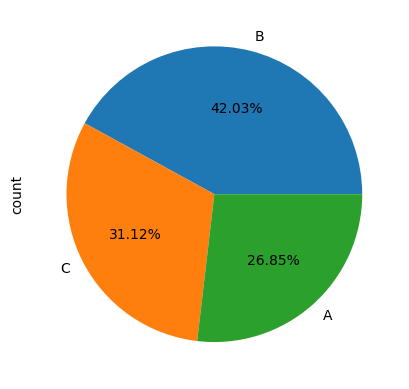

In [84]:
df1['City_Category'].value_counts().plot.pie(autopct='%.2f%%')
plt.show()

In [85]:
df1.groupby('City_Category')['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
City_Category,,,,,,,,
A,147720.0,8911.939216,4892.115238,12.0,5403.0,7931.0,11786.0,23961.0
B,231173.0,9151.300563,4955.496566,12.0,5460.0,8005.0,11986.0,23960.0
C,171175.0,9719.920993,5189.465121,12.0,6031.5,8585.0,13197.0,23961.0


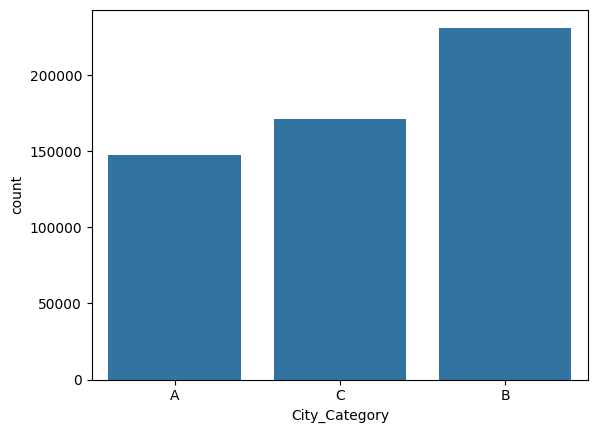

In [86]:
sns.countplot(data=df1,x='City_Category')
plt.show()

<Axes: xlabel='City_Category', ylabel='Purchase'>

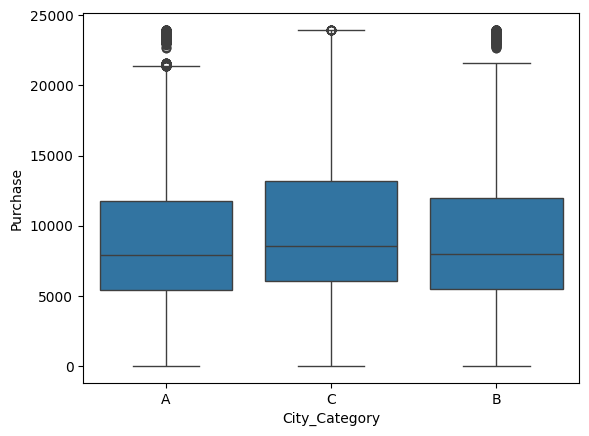

In [87]:
sns.boxplot(data=df1,x='City_Category',y='Purchase')

#### Observation

1. On average, all City_Category group  spend almost equal amount of mony having same mean and IQR.

However, this is at the population level, not based on random sampling.

2. The means of City_Category groups look similar (8,900–9,700),

  And the IQRs and stds are also close,

  we cannot directly conclude there's no difference, because the number of observations is different.

3. CLT lets us:

  1. Taking equal-sized samples (e.g., 300 or 500) from each City_Category group.
  2. Compute the sampling distribution of the mean,

  3. Then calculate confidence intervals and compare them.



**Although the average spending across City_Category groups appears similar, the group sizes vary significantly. To ensure a fair comparison and reduce the effect of unequal sample sizes, we apply the Central Limit Theorem by drawing equal-sized random samples from each City_Category group. This allows us to estimate the sampling distribution of the mean and construct reliable confidence intervals, making any observed differences in spending more statistically valid**

In [88]:
City_Category_group_dfs = {group: df1[df1['City_Category'] == group].copy() for group in df1['City_Category'].unique()}

In [89]:
City_Category_group_dfs.keys()

dict_keys(['A', 'C', 'B'])

#### CLT of Purchase

##### 1.CI for sample size 300

In [90]:

for x in City_Category_group_dfs.keys():
  print(x)

A
C
B


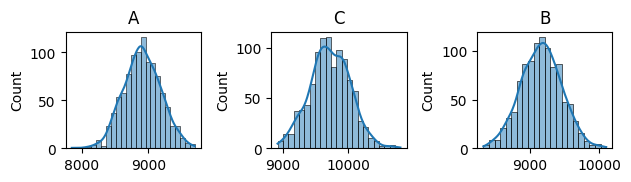

,City_Category_group,Mean,STD,CI90,CI95,CI99
0,A,8907.187433,276.163344,"(8452.93915513847, 9361.435711528198)","(8365.917225022251, 9448.457641644418)","(8195.837799001718, 9618.53706766495)"
2,B,9163.333817,291.919793,"(8683.16848712788, 9643.499146205455)","(8591.181536913331, 9735.486096420003)","(8411.398260755519, 9915.269372577815)"
1,C,9720.211953,306.273314,"(9216.437182227835, 10223.986724438832)","(9119.927288784385, 10320.496617882281)","(8931.304176653417, 10509.11973001325)"


In [91]:
CLT_CI_City_Category_groups=[]
z=1
for x in City_Category_group_dfs.keys():
  sampling_mean_disb_0_17=[]
  for i in range(1000):
    sample=np.random.choice(City_Category_group_dfs[x]['Purchase'],size=300)
    sampling_mean_disb_0_17.append(np.mean(sample))

  plt.subplot(3,3,z)
  sns.histplot(data=sampling_mean_disb_0_17,kde=True)
  plt.title(x)
  z=z+1
  mean_0_17=np.mean(sampling_mean_disb_0_17)
  std_0_17=np.std(sampling_mean_disb_0_17)
  CI_90=norm.interval(confidence=.90,loc=mean_0_17,scale=std_0_17)
  CI_95=norm.interval(confidence=.95,loc=mean_0_17,scale=std_0_17)
  CI_99=norm.interval(confidence=.99,loc=mean_0_17,scale=std_0_17)
  CLT_CI_City_Category_groups.append([x,mean_0_17,std_0_17,CI_90,CI_95,CI_99])
CLT_CI_City_Category_groups_df=pd.DataFrame(CLT_CI_City_Category_groups,columns=["City_Category_group",'Mean','STD','CI90','CI95','CI99'])
plt.tight_layout()
plt.show()
CLT_CI_City_Category_groups_df.head(7).sort_values(by='City_Category_group')

###### **Observation**

1. City C shows the highest average purchase amount across the samples.

  With a mean of 9,721, it clearly stands out above cities A and B.

  Its 95% confidence interval does not overlap much with City A, indicating a statistically significant difference.

2. City A has the lowest average purchase and a tighter confidence interval.

  Mean of ~8,929 suggests that customers in City A generally spend less.

3. City B is in between, but closer to A than C.

  Its confidence interval overlaps partially with both A and C, so the difference may be moderate rather than sharply distinct.

**Statistical Takeaway (CLT-based):**

Using Central Limit Theorem (CLT) sampling of size 300 shows that:

  1. The sampling distribution of mean purchase for each city is approximately normal.

  2. City Category appears to be a meaningful factor affecting average customer spend.

  3. Since CI widths are relatively narrow, the means are estimated with good precision.

##### 2.CI for sample size 500

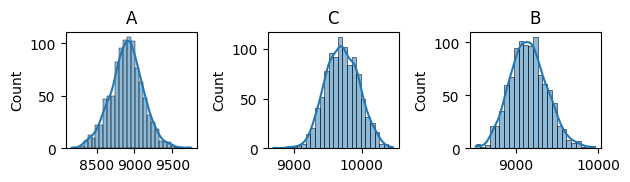

,City_Category_group,Mean,STD,CI90,CI95,CI99
0,A,8899.173896,217.027493,"(8542.195436471558, 9256.152355528446)","(8473.807825446309, 9324.539966553695)","(8340.148119041773, 9458.199672958232)"
2,B,9152.929958,224.490931,"(8783.675235924668, 9522.184680075334)","(8712.93581838143, 9592.924097618572)","(8574.679639545673, 9731.180276454328)"
1,C,9713.373892,244.799766,"(9310.714108440994, 10116.033675559009)","(9233.57516652859, 10193.172617471413)","(9082.811480331655, 10343.936303668348)"


In [92]:
CLT_CI_City_Category_groups=[]
z=1
for x in City_Category_group_dfs.keys():
  sampling_mean_disb_0_17=[]
  for i in range(1000):
    sample=np.random.choice(City_Category_group_dfs[x]['Purchase'],size=500)
    sampling_mean_disb_0_17.append(np.mean(sample))

  plt.subplot(3,3,z)
  sns.histplot(data=sampling_mean_disb_0_17,kde=True)
  plt.title(x)
  z=z+1
  mean_0_17=np.mean(sampling_mean_disb_0_17)
  std_0_17=np.std(sampling_mean_disb_0_17)
  CI_90=norm.interval(confidence=.90,loc=mean_0_17,scale=std_0_17)
  CI_95=norm.interval(confidence=.95,loc=mean_0_17,scale=std_0_17)
  CI_99=norm.interval(confidence=.99,loc=mean_0_17,scale=std_0_17)
  CLT_CI_City_Category_groups.append([x,mean_0_17,std_0_17,CI_90,CI_95,CI_99])
CLT_CI_City_Category_groups_df=pd.DataFrame(CLT_CI_City_Category_groups,columns=["City_Category_group",'Mean','STD','CI90','CI95','CI99'])
plt.tight_layout()
plt.show()
CLT_CI_City_Category_groups_df.head(7).sort_values(by='City_Category_group')

###### **Observation**
**🧠 Key Observations (Sample Size = 500)**

1. City C again shows the highest average purchase with a clearly higher confidence interval.

  The 95% CI of City C does not overlap significantly with City A, indicating statistical significance in higher spending.

2. City A has the lowest mean purchase again, consistent with the earlier sample of size 300.

3. City B remains intermediate, but its average is closer to City A, and there is some overlap in CI between A and B, indicating less certainty in difference.

**📈 Comparison with Sample Size = 300**

  1. Confidence Intervals (CIs) in sample size 500 are narrower than in 300, due to reduced standard error.

  2. The mean estimates are stable across sample sizes, confirming the robustness of CLT assumptions.

**🔍 Combined CLT Inference (Size 300 + 500)**

By comparing both sizes:

  1. We validate consistency of the mean spending patterns across sample sizes.

  2. The increased sample size enhances precision, making it easier to draw statistically sound conclusions.

  3. City Category remains a strong factor in predicting average purchase behavior.







####**Final Conclusion:**

1. City Category C customers consistently spend the most.

2. Larger sample sizes (500) help narrow down confidence intervals, increasing confidence in the conclusions.

3. There is strong statistical evidence that city plays a significant role in influencing spending behavior.

In [93]:
df1.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


## 6.Stay in Current City

In [94]:
df1.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category',
       'Purchase'],
      dtype='object')

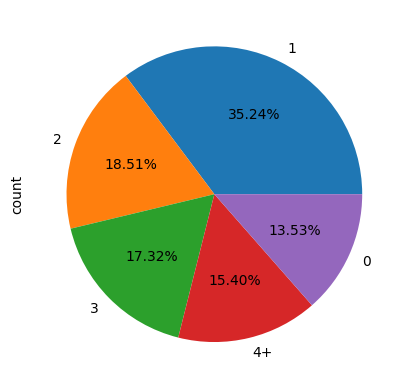

In [95]:
df1['Stay_In_Current_City_Years'].value_counts().plot.pie(autopct='%.2f%%')
plt.show()

In [96]:
df1.groupby('Stay_In_Current_City_Years')['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Stay_In_Current_City_Years,,,,,,,,
0,74398.0,9180.075123,4990.479940,12.0,5480.0,8025.0,11990.0,23960.0
1,193821.0,9250.145923,5027.476933,12.0,5500.0,8041.0,12042.0,23961.0
2,101838.0,9320.429810,5044.588224,12.0,5846.0,8072.0,12117.0,23961.0
3,95285.0,9286.904119,5020.343541,12.0,5832.0,8047.0,12075.0,23961.0
4+,84726.0,9275.598872,5017.627594,12.0,5844.0,8052.0,12038.0,23958.0


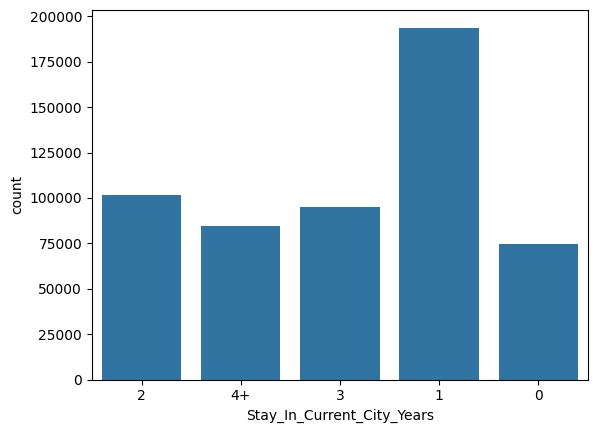

In [97]:
sns.countplot(data=df1,x='Stay_In_Current_City_Years')
plt.show()

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='Purchase'>

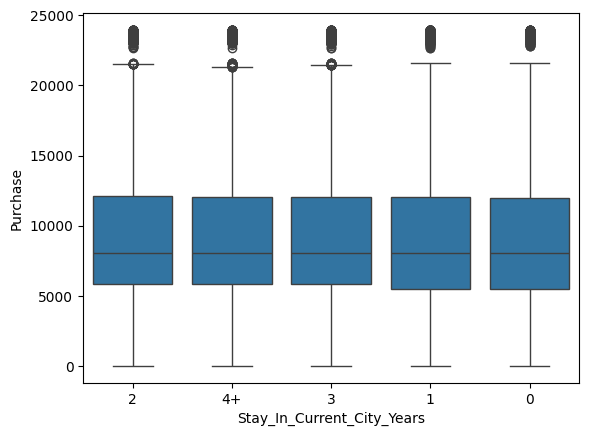

In [98]:
sns.boxplot(data=df1,x='Stay_In_Current_City_Years',y='Purchase')

#### Observation

1. On average, all Stay_In_Current_City_Years group  spend almost equal amount of mony having same mean and IQR.

However, this is at the population level, not based on random sampling.

2. The means of Stay_In_Current_City_Years groups look similar (9,100–9,300),

  And the IQRs and stds are also close,

  we cannot directly conclude there's no difference, because the number of observations is different.

3. CLT lets us:

  1. Taking equal-sized samples (e.g., 300 or 500) from each Stay_In_Current_City_Years group.
  2. Compute the sampling distribution of the mean,

  3. Then calculate confidence intervals and compare them.



**Although the average spending across Stay_In_Current_City_Years groups appears similar, the group sizes vary significantly. To ensure a fair comparison and reduce the effect of unequal sample sizes, we apply the Central Limit Theorem by drawing equal-sized random samples from each Stay_In_Current_City_Years group. This allows us to estimate the sampling distribution of the mean and construct reliable confidence intervals, making any observed differences in spending more statistically valid**

In [99]:
Stay_In_Current_City_Years_group_dfs = {group: df1[df1['Stay_In_Current_City_Years'] == group].copy() for group in df1['Stay_In_Current_City_Years'].unique()}

In [100]:
Stay_In_Current_City_Years_group_dfs.keys()

dict_keys(['2', '4+', '3', '1', '0'])

#### CLT of Purchase

##### 1.CI for sample size 300

In [101]:

for x in Stay_In_Current_City_Years_group_dfs.keys():
  print(x)

2
4+
3
1
0


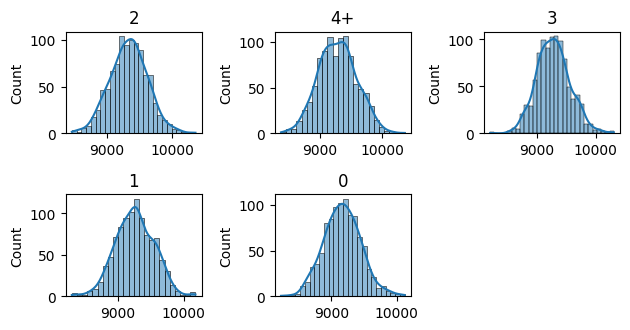

,Stay_In_Current_City_Years_group_dfs,Mean,STD,CI90,CI95,CI99
4,0,9166.983640,281.209045,"(8704.435921787697, 9629.531358212304)","(8615.824038943267, 9718.143241056734)","(8442.637140506838, 9891.330139493162)"
3,1,9261.625100,290.329731,"(8784.075189745115, 9739.175010254887)","(8692.589284542893, 9830.660915457109)","(8513.785272439483, 10009.464927560519)"
0,2,9332.250120,285.472269,"(8862.690023082003, 9801.810216917998)","(8772.734754342748, 9891.765485657254)","(8596.922284379572, 10067.577955620429)"
2,3,9283.771057,284.481010,"(8815.841435188873, 9751.70067814446)","(8726.198522327724, 9841.343591005609)","(8550.996534209658, 10016.545579123675)"
1,4+,9287.119353,306.298388,"(8783.30333932004, 9790.935367346623)","(8686.785544828614, 9887.45316183805)","(8498.146990547568, 10076.091716119096)"


In [102]:
CLT_CI_City_Category_groups=[]
z=1
for x in Stay_In_Current_City_Years_group_dfs.keys():
  sampling_mean_disb_0_17=[]
  for i in range(1000):
    sample=np.random.choice(Stay_In_Current_City_Years_group_dfs[x]['Purchase'],size=300)
    sampling_mean_disb_0_17.append(np.mean(sample))

  plt.subplot(3,3,z)
  sns.histplot(data=sampling_mean_disb_0_17,kde=True)
  plt.title(x)
  z=z+1
  mean_0_17=np.mean(sampling_mean_disb_0_17)
  std_0_17=np.std(sampling_mean_disb_0_17)
  CI_90=norm.interval(confidence=.90,loc=mean_0_17,scale=std_0_17)
  CI_95=norm.interval(confidence=.95,loc=mean_0_17,scale=std_0_17)
  CI_99=norm.interval(confidence=.99,loc=mean_0_17,scale=std_0_17)
  CLT_CI_City_Category_groups.append([x,mean_0_17,std_0_17,CI_90,CI_95,CI_99])
CLT_CI_City_Category_groups_df=pd.DataFrame(CLT_CI_City_Category_groups,columns=["Stay_In_Current_City_Years_group_dfs",'Mean','STD','CI90','CI95','CI99'])
plt.tight_layout()
plt.show()
CLT_CI_City_Category_groups_df.head(7).sort_values(by='Stay_In_Current_City_Years_group_dfs')

###### **Observation**
**🧠 Key Observations (Sample Size = 500)**

1. Increasing trend in average purchase as the stay duration increases from 0 to 2 years.

  Purchases tend to rise slightly, with 2 years showing the highest mean (9,332).

2. Beyond 2 years (3 and 4+), the mean stabilizes:

  The differences between 2, 3, and 4+ years are very minimal (all around 9,280–9,330).

  This suggests a plateau effect — longer stay doesn’t necessarily lead to higher purchases.

3. Confidence Intervals overlap significantly:

  The 95% CIs of all stay groups overlap, indicating no strong statistically significant difference between groups.

  That means we cannot confidently say that people who have stayed longer spend more based on this alone.






##### 2.CI for sample size 500

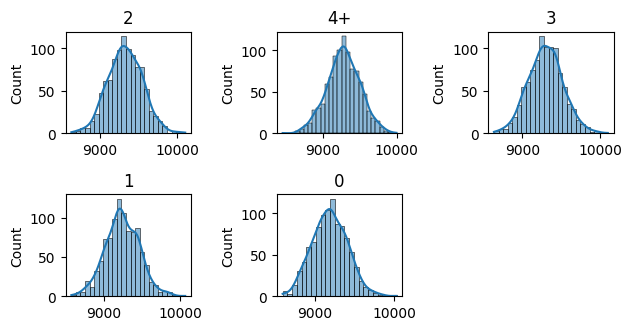

,Stay_In_Current_City_Years_group_dfs,Mean,STD,CI90,CI95,CI99
4,0,9191.774618,220.314059,"(8829.390238296975, 9554.158997703027)","(8759.9669962518, 9623.582239748202)","(8624.283207765853, 9759.26602823415)"
3,1,9242.918484,221.213347,"(8879.05490756122, 9606.78206043878)","(8809.348290628022, 9676.488677371977)","(8673.110661998116, 9812.726306001883)"
0,2,9325.541994,222.396505,"(8959.732295678863, 9691.351692321135)","(8889.652853375546, 9761.431134624452)","(8752.686558708572, 9898.397429291426)"
2,3,9296.760218,223.105714,"(8929.783975111168, 9663.736460888831)","(8859.481053788293, 9734.039382211706)","(8722.077982054625, 9871.442453945374)"
1,4+,9279.976768,225.663091,"(8908.794014362342, 9651.159521637655)","(8837.685237074813, 9722.268298925184)","(8698.707165571079, 9861.246370428918)"


In [103]:
CLT_CI_City_Category_groups=[]
z=1
for x in Stay_In_Current_City_Years_group_dfs.keys():
  sampling_mean_disb_0_17=[]
  for i in range(1000):
    sample=np.random.choice(Stay_In_Current_City_Years_group_dfs[x]['Purchase'],size=500)
    sampling_mean_disb_0_17.append(np.mean(sample))

  plt.subplot(3,3,z)
  sns.histplot(data=sampling_mean_disb_0_17,kde=True)
  plt.title(x)
  z=z+1
  mean_0_17=np.mean(sampling_mean_disb_0_17)
  std_0_17=np.std(sampling_mean_disb_0_17)
  CI_90=norm.interval(confidence=.90,loc=mean_0_17,scale=std_0_17)
  CI_95=norm.interval(confidence=.95,loc=mean_0_17,scale=std_0_17)
  CI_99=norm.interval(confidence=.99,loc=mean_0_17,scale=std_0_17)
  CLT_CI_City_Category_groups.append([x,mean_0_17,std_0_17,CI_90,CI_95,CI_99])
CLT_CI_City_Category_groups_df=pd.DataFrame(CLT_CI_City_Category_groups,columns=["Stay_In_Current_City_Years_group_dfs",'Mean','STD','CI90','CI95','CI99'])
plt.tight_layout()
plt.show()
CLT_CI_City_Category_groups_df.head(7).sort_values(by='Stay_In_Current_City_Years_group_dfs')

###### **Observation**
🧠 Inference (500-sample CLT):

1. Trend Observation:

  Mean purchase increases from 0 → 2 years, peaks at 2 years, then shows a slight decline or plateaus for 3 and 4+ years.

  Similar to the 300-sample CLT result, this indicates a mild relationship at best between stay duration and purchase.

2. Confidence Intervals:

  Overlapping CIs across all groups.

  Statistically, no strong or significant difference in average purchase between any of the stay duration groups.

3. Reduced STD (compared to sample size 300):

  Standard deviations are slightly smaller due to the larger sample size (500 vs 300), which tightens the confidence intervals.

  This improves estimate precision, but the conclusions remain the same — stay duration is not a strong independent predictor.






####**Final Conclusion:**

1. Stay duration in the city has minimal influence on purchase behavior when viewed in isolation.

2. The trend is non-linear and weak, and results are consistent across different sample sizes.

In [104]:
df1.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


## 7.Marital Status

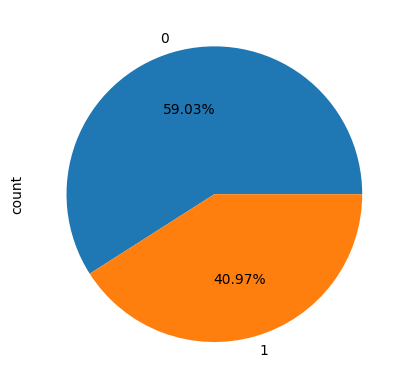

In [105]:
df1['Marital_Status'].value_counts().plot.pie(autopct='%.2f%%')
plt.show()

In [106]:
df1.groupby('Marital_Status')['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Marital_Status,,,,,,,,
0,324731.0,9265.907619,5027.347859,12.0,5605.0,8044.0,12061.0,23961.0
1,225337.0,9261.174574,5016.897378,12.0,5843.0,8051.0,12042.0,23961.0


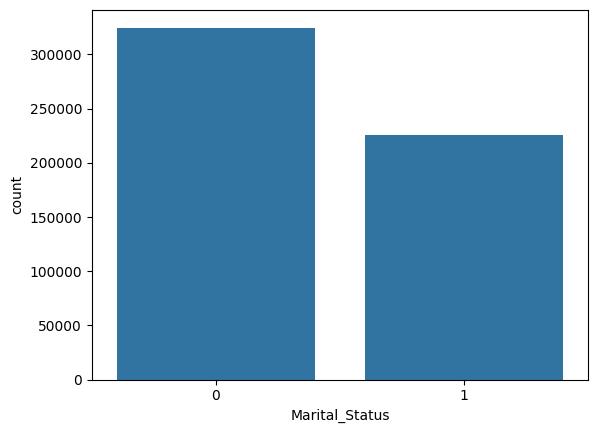

In [107]:
sns.countplot(data=df1,x='Marital_Status')
plt.show()

<Axes: xlabel='Marital_Status', ylabel='Purchase'>

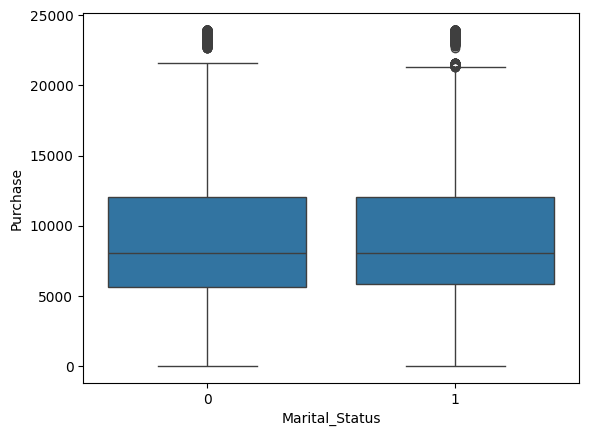

In [108]:
sns.boxplot(data=df1,x='Marital_Status',y='Purchase')

#### Observation

1. On average, all Marital_Status group  spend almost equal amount of mony having same mean and IQR.

However, this is at the population level, not based on random sampling.

2. The means of Marital_Status groups look similar (~9,260),

  And the IQRs and stds are also close,

  we cannot directly conclude there's no difference, because the number of observations is different.

3. CLT lets us:

  1. Taking equal-sized samples (e.g., 300 or 500) from each Marital_Status group.
  2. Compute the sampling distribution of the mean,

  3. Then calculate confidence intervals and compare them.



**Although the average spending across Marital_Status groups appears similar, the group sizes vary significantly. To ensure a fair comparison and reduce the effect of unequal sample sizes, we apply the Central Limit Theorem by drawing equal-sized random samples from each Marital_Status group. This allows us to estimate the sampling distribution of the mean and construct reliable confidence intervals, making any observed differences in spending more statistically valid**

In [109]:
Marital_Status_group_dfs = {group: df1[df1['Marital_Status'] == group].copy() for group in df1['Marital_Status'].unique()}

In [110]:
Marital_Status_group_dfs.keys()

dict_keys([np.int64(0), np.int64(1)])

#### CLT of Purchase

##### 1.CI for sample size 300

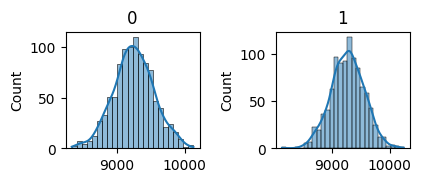

,Marital_Status_group_dfs,Mean,STD,CI90,CI95,CI99
0,0,9252.719443,294.725103,"(8767.939788228601, 9737.499098438062)","(8675.06885553969, 9830.370031126973)","(8493.557885780385, 10011.881000886278)"
1,1,9269.790270,286.490581,"(8798.555199198656, 9741.025340801343)","(8708.279049859033, 9831.301490140966)","(8531.83943696466, 10007.74110303534)"


In [111]:
CLT_CI_City_Category_groups=[]
z=1
for x in Marital_Status_group_dfs.keys():
  sampling_mean_disb_0_17=[]
  for i in range(1000):
    sample=np.random.choice(Marital_Status_group_dfs[x]['Purchase'],size=300)
    sampling_mean_disb_0_17.append(np.mean(sample))

  plt.subplot(3,3,z)
  sns.histplot(data=sampling_mean_disb_0_17,kde=True)
  plt.title(x)
  z=z+1
  mean_0_17=np.mean(sampling_mean_disb_0_17)
  std_0_17=np.std(sampling_mean_disb_0_17)
  CI_90=norm.interval(confidence=.90,loc=mean_0_17,scale=std_0_17)
  CI_95=norm.interval(confidence=.95,loc=mean_0_17,scale=std_0_17)
  CI_99=norm.interval(confidence=.99,loc=mean_0_17,scale=std_0_17)
  CLT_CI_City_Category_groups.append([x,mean_0_17,std_0_17,CI_90,CI_95,CI_99])
CLT_CI_City_Category_groups_df=pd.DataFrame(CLT_CI_City_Category_groups,columns=["Marital_Status_group_dfs",'Mean','STD','CI90','CI95','CI99'])
plt.tight_layout()
plt.show()
CLT_CI_City_Category_groups_df.head(7).sort_values(by='Marital_Status_group_dfs')

##### 2.CI for sample size 500

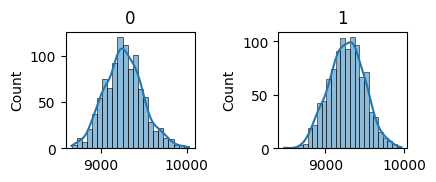

,Marital_Status_group_dfs,Mean,STD,CI90,CI95,CI99
0,0,9266.273936,225.555678,"(8895.267861624196, 9637.280010375807)","(8824.192931400301, 9708.354940599702)","(8685.281012062438, 9847.266859937565)"
1,1,9268.971574,225.829017,"(8897.515895857372, 9640.427252142626)","(8826.354833468637, 9711.588314531362)","(8687.27457370051, 9850.668574299489)"


In [112]:
CLT_CI_City_Category_groups=[]
z=1
for x in Marital_Status_group_dfs.keys():
  sampling_mean_disb_0_17=[]
  for i in range(1000):
    sample=np.random.choice(Marital_Status_group_dfs[x]['Purchase'],size=500)
    sampling_mean_disb_0_17.append(np.mean(sample))

  plt.subplot(3,3,z)
  sns.histplot(data=sampling_mean_disb_0_17,kde=True)
  plt.title(x)
  z=z+1
  mean_0_17=np.mean(sampling_mean_disb_0_17)
  std_0_17=np.std(sampling_mean_disb_0_17)
  CI_90=norm.interval(confidence=.90,loc=mean_0_17,scale=std_0_17)
  CI_95=norm.interval(confidence=.95,loc=mean_0_17,scale=std_0_17)
  CI_99=norm.interval(confidence=.99,loc=mean_0_17,scale=std_0_17)
  CLT_CI_City_Category_groups.append([x,mean_0_17,std_0_17,CI_90,CI_95,CI_99])
CLT_CI_City_Category_groups_df=pd.DataFrame(CLT_CI_City_Category_groups,columns=["Marital_Status_group_dfs",'Mean','STD','CI90','CI95','CI99'])
plt.tight_layout()
plt.show()
CLT_CI_City_Category_groups_df.head(7).sort_values(by='Marital_Status_group_dfs')

###### **Observation**
🧠 Inference:

1. Very Close Mean Purchases:

  The difference in means is tiny (less than 20 units).

  Not practically significant, even before checking statistically.

2. Substantial Overlap in Confidence Intervals:

  Both 95% CIs overlap heavily, indicating no statistical difference.

3. Consistent Across Sample Sizes:

  The results from both sample sizes (300 and 500) align.

  As expected with CLT, the larger sample gives tighter CIs, but no new insight.


####**Final Conclusion:**

1. Marital Status in the city has minimal influence on purchase behavior when viewed in isolation.




In [113]:
df1.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


## 8.Product_Category

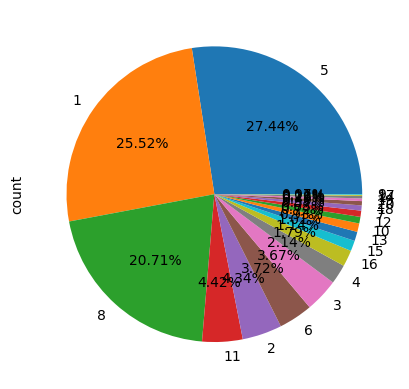

In [114]:
df1['Product_Category'].value_counts().plot.pie(autopct='%.2f%%')
plt.show()

In [136]:
purchas_list_orignal=df1.groupby('Product_Category')['Purchase'].describe().sort_values(by='mean')
purchas_list_orignal

,count,mean,std,min,25%,50%,75%,max
Product_Category,,,,,,,,
19,1603.0,37.041797,16.869148,12.0,24.00,37.0,50.00,62.0
20,2550.0,370.481176,167.116975,118.0,242.00,368.0,490.00,613.0
13,5549.0,722.400613,183.493126,185.0,578.00,755.0,927.00,962.0
12,3947.0,1350.859894,362.510258,342.0,1071.00,1401.0,1723.00,1778.0
4,11753.0,2329.659491,812.540292,684.0,2058.00,2175.0,2837.00,3556.0
18,3125.0,2972.864320,727.051652,754.0,2359.00,3071.0,3769.00,3900.0
11,24287.0,4685.268456,1834.901184,1472.0,3131.00,4611.0,6058.00,7654.0
5,150933.0,6240.088178,1909.091687,1713.0,5242.00,6912.0,7156.00,8907.0
8,113925.0,7498.958078,2013.015062,1939.0,6036.00,7905.0,9722.00,10082.0


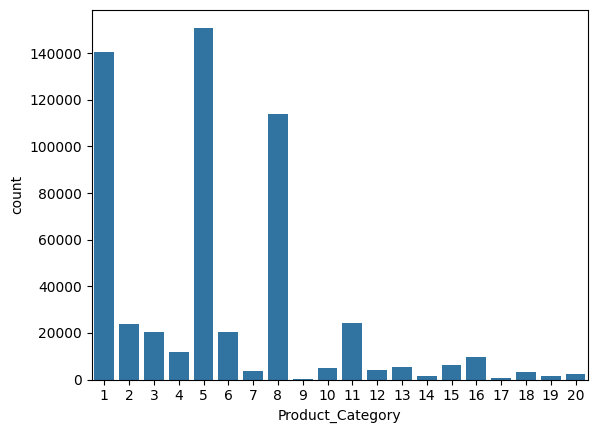

In [116]:
sns.countplot(data=df1,x='Product_Category')
plt.show()

<Axes: xlabel='Product_Category', ylabel='Purchase'>

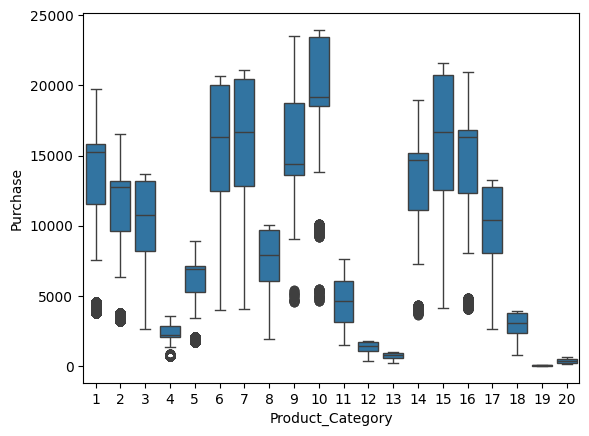

In [117]:
sns.boxplot(data=df1,x='Product_Category',y='Purchase')

#### Observation

1. On average, all Stay_In_Current_City_Years group  spend almost equal amount of mony having same mean and IQR.

However, this is at the population level, not based on random sampling.

2. The means of Stay_In_Current_City_Years groups look similar (9,100–9,300),

  And the IQRs and stds are also close,

  we cannot directly conclude there's no difference, because the number of observations is different.

3. CLT lets us:

  1. Taking equal-sized samples (e.g., 300 or 500) from each Stay_In_Current_City_Years group.
  2. Compute the sampling distribution of the mean,

  3. Then calculate confidence intervals and compare them.



**Although the average spending across Stay_In_Current_City_Years groups appears similar, the group sizes vary significantly. To ensure a fair comparison and reduce the effect of unequal sample sizes, we apply the Central Limit Theorem by drawing equal-sized random samples from each Stay_In_Current_City_Years group. This allows us to estimate the sampling distribution of the mean and construct reliable confidence intervals, making any observed differences in spending more statistically valid**

In [126]:
Product_Category_group_dfs = {group: df1[df1['Product_Category'] == group].copy() for group in df1['Product_Category'].unique()}

In [127]:
Product_Category_group_dfs.keys()

dict_keys([np.int64(3), np.int64(1), np.int64(12), np.int64(8), np.int64(5), np.int64(4), np.int64(2), np.int64(6), np.int64(14), np.int64(11), np.int64(13), np.int64(15), np.int64(7), np.int64(16), np.int64(18), np.int64(10), np.int64(17), np.int64(9), np.int64(20), np.int64(19)])

#### CLT of Purchase

##### 1.CI for sample size 300

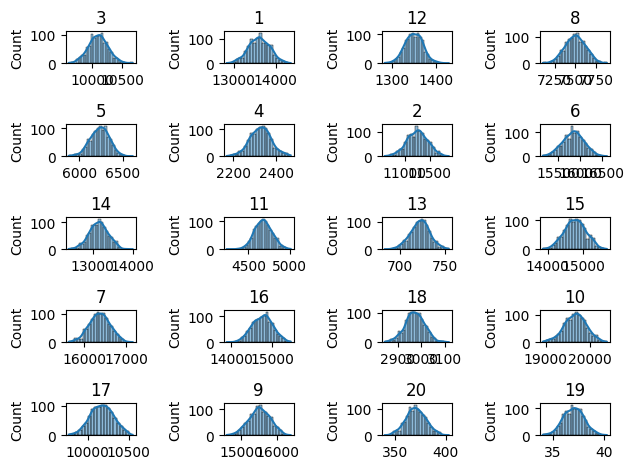

,Product_Category,Mean,STD,CI90,CI95,CI99
19,19,37.043247,1.002314,"(35.39458610620606, 38.69190722712729)","(35.078746441061035, 39.007746892272316)","(34.461455731803696, 39.625037601529655)"
18,20,370.527597,9.803331,"(354.4025528565736, 386.65264047675976)","(351.313421861649, 389.7417714716844)","(345.2758905656028, 395.77930276773054)"
10,13,722.018810,10.840886,"(704.1871399490059, 739.8504800509942)","(700.7710646009615, 743.2665553990386)","(694.0945391129341, 749.943080887066)"
2,12,1349.916090,20.770937,"(1315.7509385541618, 1384.081241445838)","(1309.2058010946548, 1390.626378905345)","(1296.4137012084334, 1403.4184787915665)"
5,4,2327.462007,49.377542,"(2246.2431769638047, 2408.6808363695286)","(2230.6838019220095, 2424.240211411324)","(2200.2738860213567, 2454.6501273119766)"
14,18,2973.276637,41.871378,"(2904.4043480328805, 3042.1489253004524)","(2891.2102430111718, 3055.343030322161)","(2865.4231131928614, 3081.1301601404716)"
9,11,4680.838933,105.611280,"(4507.123836187804, 4854.554030478863)","(4473.844627945114, 4887.833238721553)","(4408.802303225639, 4952.875563441028)"
4,5,6233.256180,109.429553,"(6053.260583558861, 6413.251776441138)","(6018.778198117636, 6447.734161882363)","(5951.3843318148565, 6515.128028185142)"
3,8,7500.234117,122.244134,"(7299.160408958545, 7701.30782437479)","(7260.640016080184, 7739.828217253151)","(7185.3540933008635, 7815.114140032471)"
0,3,10102.162540,164.621936,"(9831.383550765207, 10372.941529234791)","(9779.509473505586, 10424.815606494412)","(9678.124532101983, 10526.200547898015)"


In [139]:
CLT_CI_City_Category_groups=[]
z=1
for x in Product_Category_group_dfs.keys():
  sampling_mean_disb_0_17=[]
  for i in range(1000):
    sample=np.random.choice(Product_Category_group_dfs[x]['Purchase'],size=300)
    sampling_mean_disb_0_17.append(np.mean(sample))

  plt.subplot(5,4,z)
  sns.histplot(data=sampling_mean_disb_0_17,kde=True)
  plt.title(x)
  z=z+1
  mean_0_17=np.mean(sampling_mean_disb_0_17)
  std_0_17=np.std(sampling_mean_disb_0_17)
  CI_90=norm.interval(confidence=.90,loc=mean_0_17,scale=std_0_17)
  CI_95=norm.interval(confidence=.95,loc=mean_0_17,scale=std_0_17)
  CI_99=norm.interval(confidence=.99,loc=mean_0_17,scale=std_0_17)
  CLT_CI_City_Category_groups.append([x,mean_0_17,std_0_17,CI_90,CI_95,CI_99])
CLT_CI_City_Category_groups_df=pd.DataFrame(CLT_CI_City_Category_groups,columns=["Product_Category",'Mean','STD','CI90','CI95','CI99'])
plt.tight_layout()
plt.show()
purchase_list_500_sample=CLT_CI_City_Category_groups_df.sort_values(by='Mean')
purchase_list_500_sample

In [142]:
purchas_list_orignal.index==purchase_list_500_sample['Product_Category']

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

##### 2.CI for sample size 500

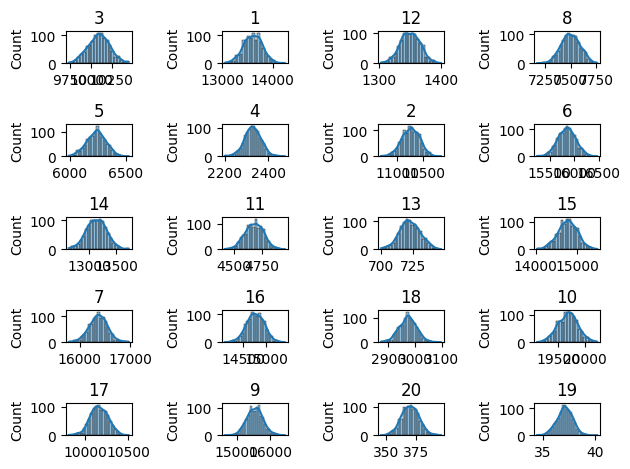

,Product_Category,Mean,STD,CI90,CI95,CI99
1,1,13606.585336,185.413281,"(13301.60762827631, 13911.56304372369)","(13243.181983001434, 13969.988688998566)","(13128.992373555184, 14084.178298444816)"
6,2,11259.090350,166.797339,"(10984.73314251752, 11533.447557482485)","(10932.17357348338, 11586.007126516624)","(10829.448877291577, 11688.731822708427)"
0,3,10095.296208,128.738130,"(9883.540827457418, 10307.051588542581)","(9842.974109184894, 10347.618306815106)","(9763.688759502198, 10426.903656497801)"
5,4,2328.980996,38.003355,"(2266.47103966111, 2391.4909523388906)","(2254.495788871591, 2403.4662031284097)","(2231.0908405095715, 2426.871151490429)"
4,5,6236.595612,84.179551,"(6098.132572786581, 6375.05865121342)","(6071.606724477387, 6401.584499522613)","(6019.763458657952, 6453.427765342049)"
7,6,15848.514822,180.496048,"(15551.625242400827, 16145.404401599175)","(15494.749068096364, 16202.280575903638)","(15383.58781176675, 16313.441832233251)"
12,7,16365.683820,184.050125,"(16062.948304682599, 16668.4193353174)","(16004.952204042793, 16726.41543595721)","(15891.602115219503, 16839.765524780498)"
3,8,7500.987606,91.447212,"(7350.570327613564, 7651.404884386435)","(7321.75436392949, 7680.220848070509)","(7265.435197518558, 7736.540014481441)"
17,9,15541.160058,240.207357,"(15146.054115665907, 15936.266000334092)","(15070.362289515384, 16011.957826484615)","(14922.4269089862, 16159.8932070138)"
15,10,19677.869372,187.549986,"(19369.377097467743, 19986.36164653226)","(19310.278154346986, 20045.460589653016)","(19194.77262245434, 20160.96612154566)"


In [143]:
CLT_CI_City_Category_groups=[]
z=1
for x in Product_Category_group_dfs.keys():
  sampling_mean_disb_0_17=[]
  for i in range(1000):
    sample=np.random.choice(Product_Category_group_dfs[x]['Purchase'],size=500)
    sampling_mean_disb_0_17.append(np.mean(sample))

  plt.subplot(5,4,z)
  sns.histplot(data=sampling_mean_disb_0_17,kde=True)
  plt.title(x)
  z=z+1
  mean_0_17=np.mean(sampling_mean_disb_0_17)
  std_0_17=np.std(sampling_mean_disb_0_17)
  CI_90=norm.interval(confidence=.90,loc=mean_0_17,scale=std_0_17)
  CI_95=norm.interval(confidence=.95,loc=mean_0_17,scale=std_0_17)
  CI_99=norm.interval(confidence=.99,loc=mean_0_17,scale=std_0_17)
  CLT_CI_City_Category_groups.append([x,mean_0_17,std_0_17,CI_90,CI_95,CI_99])
CLT_CI_City_Category_groups_df=pd.DataFrame(CLT_CI_City_Category_groups,columns=["Product_Category",'Mean','STD','CI90','CI95','CI99'])
plt.tight_layout()
plt.show()
CLT_CI_City_Category_groups_df.sort_values(by='Product_Category')

###### **Observation**
 1. Comparison of Means: Stable Patterns

1. The mean purchase amount per Product_Category across the sample datasets is remarkably consistent with the original population.

2. For example:

    1. Product_Category 1:

                  Original Mean: 13,606

                  Sample Mean (300): 13,610

                  Sample Mean (500): 13,606

    2.	Product_Category 2:

              Original Mean: 11,251

              Sample Mean (300): 11,251

              Sample Mean (500): 11,259

✅ Inference: The sample means reliably estimate the population means, indicating that even smaller samples (n = 300 or 500) can represent the purchase trends well for this dataset.







####**Final Conclusion:**

1. Sampling works well: Even with sample sizes of 300–500, the estimates are reliable for means and confidence intervals.

2.  Product category is a dominant factor affecting purchase behavior.

**Now that I have strong evidence for the influence of age, city category, and gender on purchase behavior, I will proceed with bivariate analysis of age and city category in relation to purchases.**

## 9.Age vs City Category

In [144]:



 ##📌 Step 3: Create a two-way contingency table (Age vs City_Category)
contingency_table = pd.crosstab(df1['Age'],df1['City_Category'], margins=True)
print("Two-Way Contingency Table:\n")
print(contingency_table)

# 📌 Step 4: Compute marginal probabilities
total = contingency_table.loc['All', 'All']
print(total)
marginal_probs = contingency_table / total
print("\n📊 Marginal Probabilities:\n")
print(round(marginal_probs,2))

# 📌 Step 5: Conditional Probabilities
# Probability of City_Category given Age
cond_prob_City_given_gender =pd.crosstab(df1['Age'],df1['City_Category'], normalize='index')
print("\n🎯 P(City_Category | Age):\n")
print(round(cond_prob_City_given_gender,2))

# Probability of Age given City_Category
cond_prob_gendre_given_city = pd.crosstab(df1['City_Category'],df1['Age'],normalize='index')
print("\n🌍 P(Age | City_Category):\n")
print(round(cond_prob_gendre_given_city ,2))

Two-Way Contingency Table:

City_Category       A       B       C     All
Age                                          
0-17             2544    5435    7123   15102
18-25           27535   43247   28878   99660
26-35           73745   91584   54258  219587
36-45           26617   47598   35798  110013
46-50            7607   20406   17688   45701
51-55            6099   17741   14661   38501
55+              3573    5162   12769   21504
All            147720  231173  171175  550068
550068

📊 Marginal Probabilities:

City_Category     A     B     C   All
Age                                  
0-17           0.00  0.01  0.01  0.03
18-25          0.05  0.08  0.05  0.18
26-35          0.13  0.17  0.10  0.40
36-45          0.05  0.09  0.07  0.20
46-50          0.01  0.04  0.03  0.08
51-55          0.01  0.03  0.03  0.07
55+            0.01  0.01  0.02  0.04
All            0.27  0.42  0.31  1.00

🎯 P(City_Category | Age):

City_Category     A     B     C
Age                            
0-17 

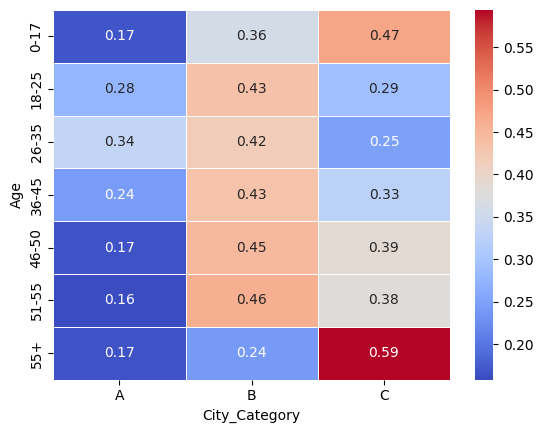

In [145]:

sns.heatmap(data=cond_prob_City_given_gender,cmap='coolwarm',annot=True,fmt='.2f', linewidths=0.5)
plt.show()

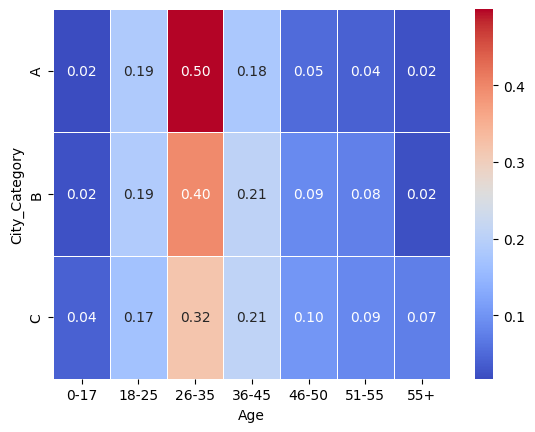

In [146]:

sns.heatmap(data=cond_prob_gendre_given_city,cmap='coolwarm',annot=True,fmt='.2f', linewidths=0.5)
plt.show()

## 10.Age vs Product Category

In [153]:



 ##📌 Step 3: Create a two-way contingency table (Gender vs Product_Category)
contingency_table = pd.crosstab(df1['Age'],df1['Product_Category'], margins=True)
print("Two-Way Contingency Table:\n")
print(contingency_table)

# 📌 Step 4: Compute marginal probabilities
total = contingency_table.loc['All', 'All']
print(total)
marginal_probs = contingency_table / total
print("\n📊 Marginal Probabilities:\n")
print(round(marginal_probs,2))

# 📌 Step 5: Conditional Probabilities
# Probability of City_Category given Age
cond_prob_City_given_gender =pd.crosstab(df1['Age'],df1['Product_Category'], normalize='index')
print("\n🎯 P(Product_Category | Age):\n")
print(round(cond_prob_City_given_gender,2))

# Probability of Age given Product_Category
cond_prob_gendre_given_city = pd.crosstab(df1['Product_Category'],df1['Age'],normalize='index')
print("\n🌍 P(Age | Product_Category):\n")
print(round(cond_prob_gendre_given_city ,2))

Two-Way Contingency Table:

Product_Category       1      2      3      4       5      6     7       8  \
Age                                                                          
0-17                3585    805   1200    758    4330    399    53    2258   
18-25              26962   4428   4710   2463   28522   3749   481   17911   
26-35              58249   8928   7662   4192   61473   8485  1651   44256   
36-45              27648   4912   3854   2354   29377   3899   809   23296   
46-50              10474   2105   1376    990   11971   1622   327   10656   
51-55               9049   1781    924    678    9893   1450   266    9340   
55+                 4411    905    487    318    5367    862   134    6208   
All               140378  23864  20213  11753  150933  20466  3721  113925   

Product_Category    9    10  ...    12    13    14    15    16   17    18  \
Age                          ...                                            
0-17               16   111  ...   12

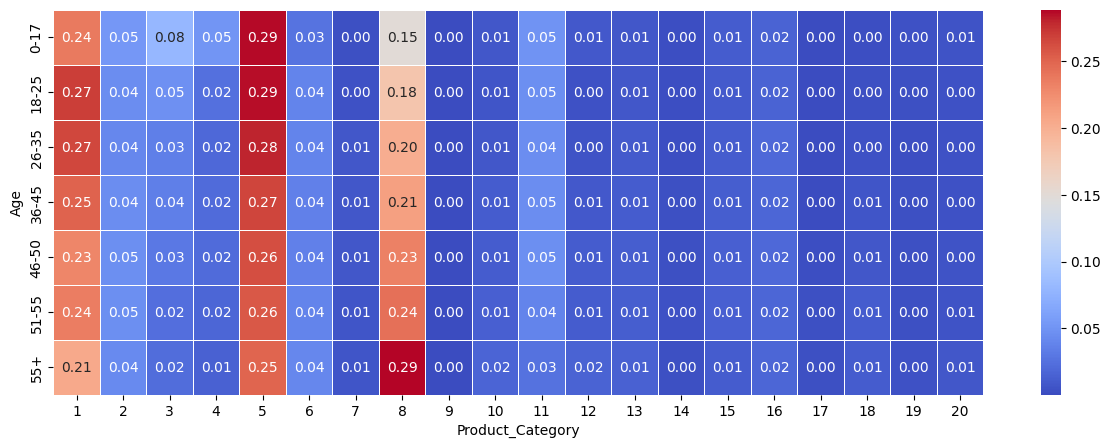

In [158]:
plt.figure(figsize=(15,5))
sns.heatmap(data=cond_prob_City_given_gender,cmap='coolwarm',annot=True,fmt='.2f', linewidths=0.5)
plt.show()

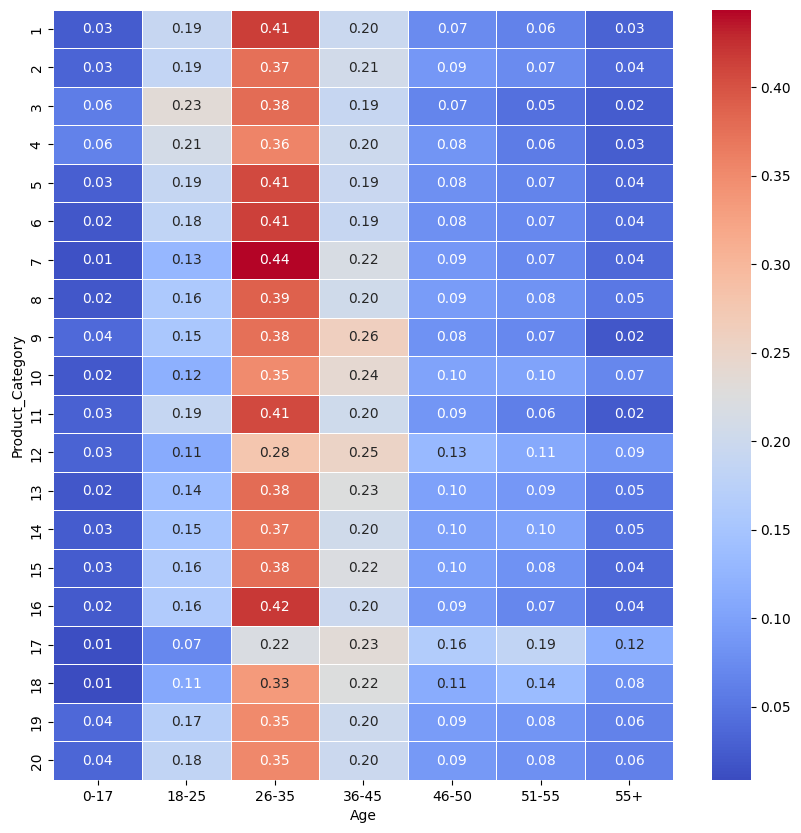

In [160]:
plt.figure(figsize=(10,10))
sns.heatmap(data=cond_prob_gendre_given_city,cmap='coolwarm',annot=True,fmt='.2f', linewidths=0.5)
plt.show()

## 11.City Category vs Product Category

In [161]:



 ##📌 Step 3: Create a two-way contingency table (Gender vs Product_Category)
contingency_table = pd.crosstab(df1['City_Category'],df1['Product_Category'], margins=True)
print("Two-Way Contingency Table:\n")
print(contingency_table)

# 📌 Step 4: Compute marginal probabilities
total = contingency_table.loc['All', 'All']
print(total)
marginal_probs = contingency_table / total
print("\n📊 Marginal Probabilities:\n")
print(round(marginal_probs,2))

# 📌 Step 5: Conditional Probabilities
# Probability of City_Category given Age
cond_prob_City_given_gender =pd.crosstab(df1['City_Category'],df1['Product_Category'], normalize='index')
print("\n🎯 P(Product_Category | City_Category):\n")
print(round(cond_prob_City_given_gender,2))

# Probability of Age given Product_Category
cond_prob_gendre_given_city = pd.crosstab(df1['Product_Category'],df1['City_Category'],normalize='index')
print("\n🌍 P(City_Category | Product_Category):\n")
print(round(cond_prob_gendre_given_city ,2))

Two-Way Contingency Table:

Product_Category       1      2      3      4       5      6     7       8  \
City_Category                                                                
A                  35081   6141   4943   3050   42211   5507  1226   32179   
B                  58253  10444   8587   5226   64138   8526  1599   47553   
C                  47044   7279   6683   3477   44584   6433   896   34193   
All               140378  23864  20213  11753  150933  20466  3721  113925   

Product_Category    9    10  ...    12    13    14    15    16   17    18  \
City_Category                ...                                            
A                 110  1333  ...  1063  1614   481  1717  2848  121   753   
B                 174  2063  ...  1675  2271   632  2638  4038  267  1389   
C                 126  1729  ...  1209  1664   410  1935  2942  190   983   
All               410  5125  ...  3947  5549  1523  6290  9828  578  3125   

Product_Category    19    20     All  
C

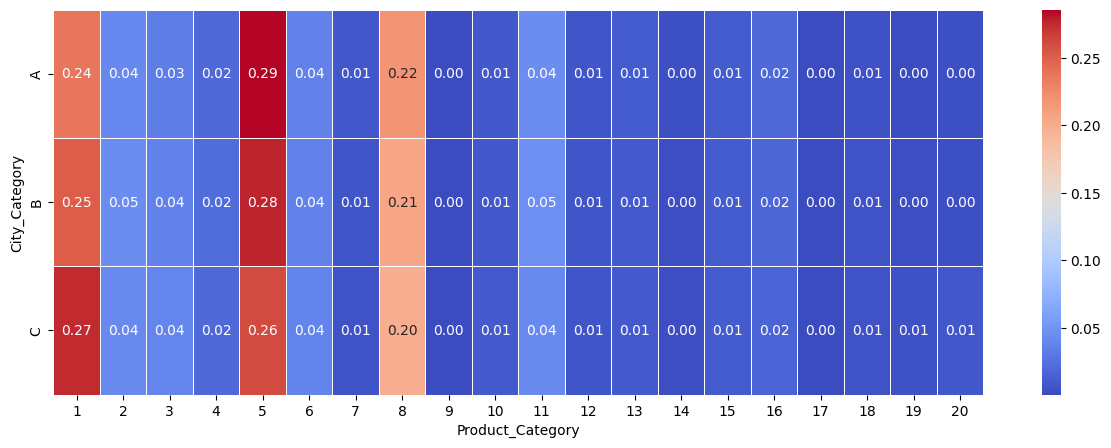

In [162]:
plt.figure(figsize=(15,5))
sns.heatmap(data=cond_prob_City_given_gender,cmap='coolwarm',annot=True,fmt='.2f', linewidths=0.5)
plt.show()

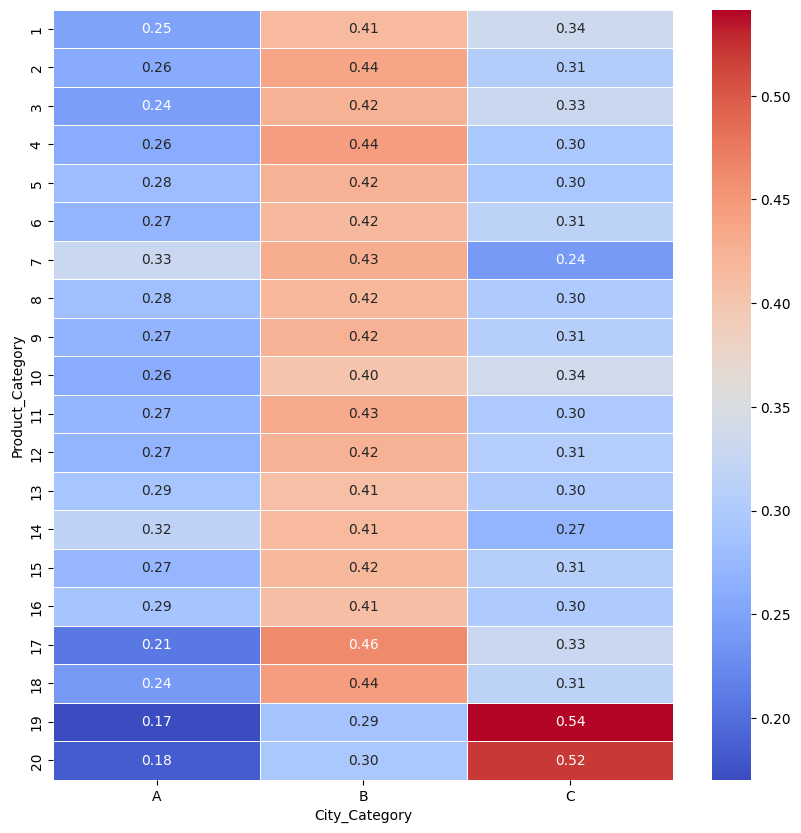

In [163]:
plt.figure(figsize=(10,10))
sns.heatmap(data=cond_prob_gendre_given_city,cmap='coolwarm',annot=True,fmt='.2f', linewidths=0.5)
plt.show()

# Recommendation:

1.  Males exhibit significantly higher purchase amounts than females.

      1.  Tailor premium product offerings or upsell strategies more toward male customers, especially in high-value categories.

      2. Launch female-focused promotions (e.g., bundles or discounts) to incentivize higher purchase volumes and bridge the spending gap.

1. Create exclusive loyalty programs or premium product lines for the 51–55 age group.

2. Segment marketing communications by age group, especially for 55+, using their preferred categories (e.g., comfort-focused, tech-simplified).

3. Prioritize inventory and delivery logistics for Category C cities.

4. Run geographically targeted campaigns, emphasizing higher-value product lines in Category C areas.

5. Ensure sufficient stock and marketing focus on Product 5.

6. Use gender-specific product recommendations: Suggest Product 17/18 to males, Product 14/12 to females.


7. On digital platforms, implement AI-driven recommendation engines:

8. For male users: Prioritize Categories 1, 5, 11, 17, and 18.

9. For female users: Emphasize Categories 5, 8, and 14.

10. Use gender-specific ad creatives highlighting relevant products.
